## Assignment - Advanced Regression

#### Part -1 _ Programming assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

#### Business Goal 

 

   Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)

### Load data set

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Find number of unique values in each column
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

### Data validation

##### Missing value treatment

In [7]:
# Find missing percentage and show the top 20 columns
(round(100* data.isnull().sum()/len(data),2)).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
dtype: float64

In [8]:
# find the columns which are having missing values more than 40%
cols_to_validate = round(100* data.isnull().sum()/len(data),2)[round(100* data.isnull().sum()/len(data),2)>=40].index
cols_to_validate

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

Check each columns which are having high missing values

In [9]:
for col in cols_to_validate:
    print("Column Name: {}".format(col))
    print(100* data[col].value_counts(dropna=False)/len(data[col]))
    print("============================")

Column Name: Alley
NaN     93.767123
Grvl     3.424658
Pave     2.808219
Name: Alley, dtype: float64
Column Name: FireplaceQu
NaN    47.260274
Gd     26.027397
TA     21.438356
Fa      2.260274
Ex      1.643836
Po      1.369863
Name: FireplaceQu, dtype: float64
Column Name: PoolQC
NaN    99.520548
Gd      0.205479
Ex      0.136986
Fa      0.136986
Name: PoolQC, dtype: float64
Column Name: Fence
NaN      80.753425
MnPrv    10.753425
GdPrv     4.041096
GdWo      3.698630
MnWw      0.753425
Name: Fence, dtype: float64
Column Name: MiscFeature
NaN     96.301370
Shed     3.356164
Gar2     0.136986
Othr     0.136986
TenC     0.068493
Name: MiscFeature, dtype: float64


Columns 'Alley', 'PoolQC' and 'MiscFeature' are having more than 90% NAN values. These columns are highly skewed and we can remove these columns.

Lets, visualize these columns using bar plot.

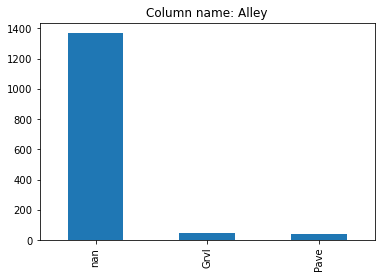

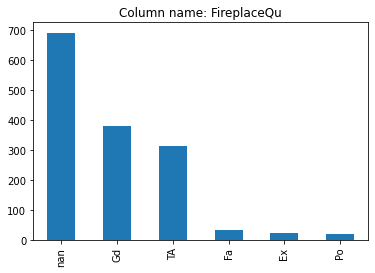

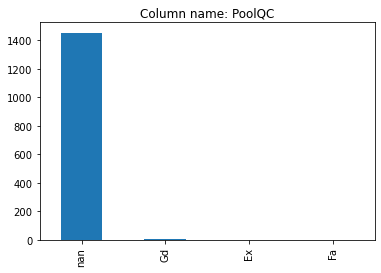

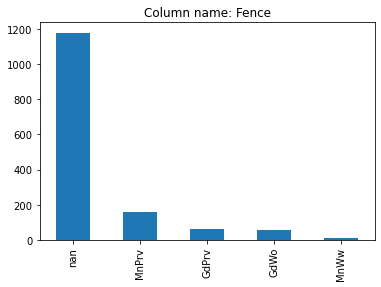

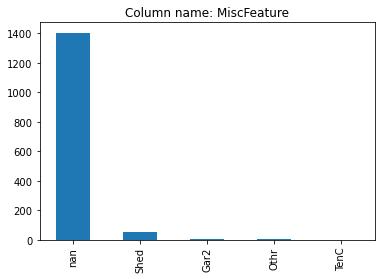

In [10]:
for col in cols_to_validate:
    data[col].value_counts(dropna=False).plot(kind='bar')
    plt.title("Column name: {}".format(col))
    plt.show()

Remove the columns which are having one value than 80%.

In [11]:
cols_to_remove = round(100* data.isnull().sum()/len(data),2)[round(100* data.isnull().sum()/len(data),2)>=90].index
cols_to_remove

Index(['Alley', 'PoolQC', 'MiscFeature'], dtype='object')

In [12]:
# drop the columns from the dataset
data.drop(labels=cols_to_remove,axis=1,inplace=True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


Column : FireplaceQu

In [13]:
data['FireplaceQu'].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [14]:
# Fill missing value to 'no_fire_place' 
data['FireplaceQu'].fillna(value='no_fire_place',inplace=True)

Column : Fence

In [15]:
100 * data['Fence'].value_counts(dropna=False)/len(data)

NaN      80.753425
MnPrv    10.753425
GdPrv     4.041096
GdWo      3.698630
MnWw      0.753425
Name: Fence, dtype: float64

In [16]:
# Fill missing value to 'no_fence' 
data['Fence'].fillna(value='no_fence',inplace=True)

In [17]:
# Find missing percentage for the balance columns
col_with_missing = (round(100* data.isnull().sum()/len(data),2))[(round(100* data.isnull().sum()/len(data),2))>0].sort_values(ascending=False)
col_with_missing

LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

Still we have 14 columns with missing values. Lets start treating the missing values in the categorical columns.

#### Missing values in categorical columns

In [18]:
data[col_with_missing.index].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


Only three columns have numerical data. Lets validate the balance 11 categorical columns and treat missing values.

In [19]:
# Find numerical columns with missing values and find the distribution.
cate_cols_with_missing = list(set(col_with_missing.index)-set(data[col_with_missing.index].describe().columns))
cate_cols_with_missing

['BsmtQual',
 'GarageFinish',
 'MasVnrType',
 'BsmtFinType2',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType1',
 'GarageType',
 'GarageCond',
 'BsmtCond',
 'Electrical']

In [20]:
for col in cate_cols_with_missing:
    print("Column Name: {}".format(col))
    print(100* data[col].value_counts(dropna=False)/len(data[col]))
    print("============================")

Column Name: BsmtQual
TA     44.452055
Gd     42.328767
Ex      8.287671
NaN     2.534247
Fa      2.397260
Name: BsmtQual, dtype: float64
Column Name: GarageFinish
Unf    41.438356
RFn    28.904110
Fin    24.109589
NaN     5.547945
Name: GarageFinish, dtype: float64
Column Name: MasVnrType
None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
NaN         0.547945
Name: MasVnrType, dtype: float64
Column Name: BsmtFinType2
Unf    86.027397
Rec     3.698630
LwQ     3.150685
NaN     2.602740
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64
Column Name: GarageQual
TA     89.794521
NaN     5.547945
Fa      3.287671
Gd      0.958904
Ex      0.205479
Po      0.205479
Name: GarageQual, dtype: float64
Column Name: BsmtExposure
No     65.273973
Av     15.136986
Gd      9.178082
Mn      7.808219
NaN     2.602740
Name: BsmtExposure, dtype: float64
Column Name: BsmtFinType1
Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10

NAN values in the most of the columns are denoting that particular feature is not avaialble for that particular house.

Except the columns "MasVnrType" and "Electrical", we can update missing values as no.

In [21]:
# Replace NAN values as "No Garage"
data['GarageFinish'].fillna('No Garage',axis=0,inplace=True)
data['GarageCond'].fillna('No Garage',axis=0,inplace=True)
data['GarageType'].fillna('No Garage',axis=0,inplace=True)
data['GarageQual'].fillna('No Garage',axis=0,inplace=True)

In [22]:
# Replace NAN values as "No Basement"
data["BsmtFinType1"].fillna("No Basement",axis=0,inplace=True)
data["BsmtFinType2"].fillna("No Basement",axis=0,inplace=True)
data["BsmtExposure"].fillna("No Basement",axis=0,inplace=True)
data["BsmtQual"].fillna("No Basement",axis=0,inplace=True)
data["BsmtCond"].fillna("No Basement",axis=0,inplace=True)

Column: "MasVnrType"

In [23]:
data["MasVnrType"].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

We can impute the missing values with the mode value ("None") in the column "MasVnrType".

In [24]:
data["MasVnrType"].fillna("None",inplace=True)

Column: "Electrical"

In [25]:
data["Electrical"].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
NaN         1
Mix         1
Name: Electrical, dtype: int64

We can impute the missing values with the mode value ("SBrkr") in the column "Electrical".

In [26]:
data["Electrical"].fillna("SBrkr",inplace=True)

#### Missing values in numerical columns

In [27]:
num_cols_with_missing = data[col_with_missing.index].describe().columns
num_cols_with_missing

Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')

In [28]:
for col in num_cols_with_missing:
    print("Column Name: {}".format(col))
    print(100* data[col].value_counts(dropna=False)/len(data[col]))
    print("============================")

Column Name: LotFrontage
NaN      17.739726
60.0      9.794521
70.0      4.794521
80.0      4.726027
50.0      3.904110
           ...    
111.0     0.068493
141.0     0.068493
112.0     0.068493
152.0     0.068493
144.0     0.068493
Name: LotFrontage, Length: 111, dtype: float64
Column Name: GarageYrBlt
NaN       5.547945
2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
            ...   
1906.0    0.068493
1908.0    0.068493
1933.0    0.068493
1900.0    0.068493
1927.0    0.068493
Name: GarageYrBlt, Length: 98, dtype: float64
Column Name: MasVnrArea
0.0      58.972603
72.0      0.547945
180.0     0.547945
108.0     0.547945
NaN       0.547945
           ...    
388.0     0.068493
426.0     0.068493
653.0     0.068493
796.0     0.068493
415.0     0.068493
Name: MasVnrArea, Length: 328, dtype: float64


In [29]:
data[num_cols_with_missing].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


Column: LotFrontage (Linear feet of street connected to property)
- Mean and Median values for the column "LotFrontage" are almost same. So, we can impute the missing values with Median


In [30]:
data["LotFrontage"].fillna(data["LotFrontage"].describe()[5],inplace=True)

Column: GarageYrBlt (Year garage was built)
- We cannot impute the missing year in this column.
- If we impute missing year, this will affect our prediction.
- So, we can remove the rows that are having missing values.

In [31]:
data.drop(data[data["GarageYrBlt"].isnull()].index,inplace=True)

Column: MasVnrArea (Masonry veneer area in square feet)
- In this column, we have minimum and median values as "0" and the mean value as "103.685".
- In our data set, there are many houses not having Masonry veneer area. So, we can impute the missing value as "0". 

In [32]:
data["MasVnrArea"].fillna(0,inplace=True)

#### Calculate the missing values again

In [33]:
(round(100* data.isnull().sum()/len(data),2))[(round(100* data.isnull().sum()/len(data),2))>0].sort_values(ascending=False)

Series([], dtype: float64)

There is not missing values in any colums.

### EDA

Checking target value's distribution

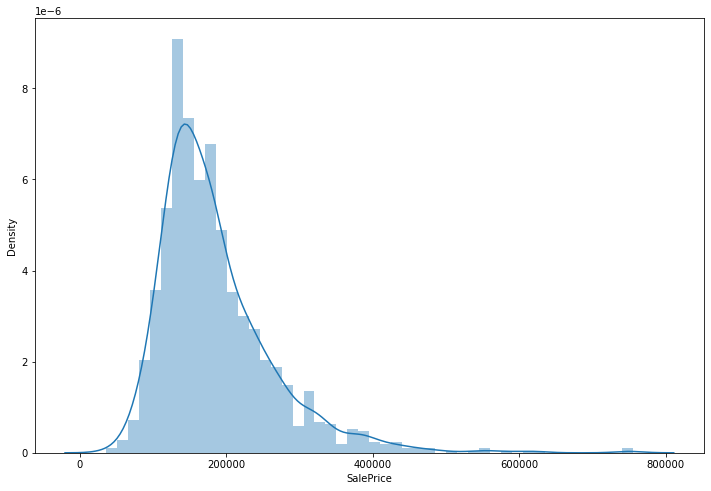

In [34]:
plt.figure(figsize=(12,8))
sns.distplot(data['SalePrice'])
plt.show()

Target variable "SalePrice" is skewed towards left. This shows that few house prices are having very high value.

Instead of delete these rows or capping these values with some values, we can normalize target values.

To normalise the target values, will convert the target value in log scale.

In [35]:
data['SalePrice'] = np.log(data['SalePrice'])
data['SalePrice'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

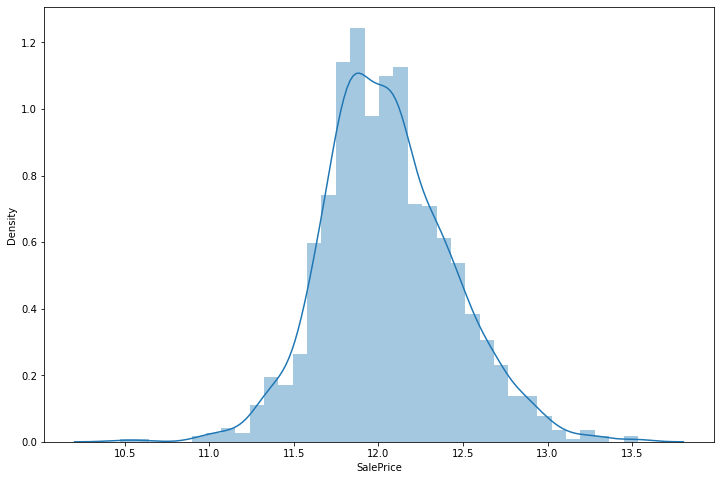

In [36]:
# Plot the target variable again.
plt.figure(figsize=(12,8))
sns.distplot(data['SalePrice'])
plt.show()

Now, we can see that the target variables are normally distributed.

There are some columns having the values as "No". Lets validate them with their correlated columns.

Below are the columns correlated between them.

- "MasVnrType","MasVnrArea"
- "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"
- "Fireplaces","FireplaceQu"
- "GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond"

###### Columns: "MasVnrType","MasVnrArea"

In [37]:
# validate the columns "MasVnrType","MasVnrArea"
data["MasVnrType"].value_counts()

None       797
BrkFace    439
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [38]:
data[["MasVnrType","MasVnrArea"]].value_counts()["None"]

MasVnrArea
0.0      792
1.0        2
288.0      1
312.0      1
344.0      1
dtype: int64

The column "MasVnrType" having the value as "None" and we have area value in the column "MasVnrArea".
So, for these we can mark the area value as "0" in the column "MasVnrArea".

In [39]:
data["MasVnrArea"].loc[data[data["MasVnrType"]=="None"].index]= 0.0

In [40]:
# validate after the data updation
data[["MasVnrType","MasVnrArea"]].value_counts()["None"]

MasVnrArea
0.0    797
dtype: int64

###### Columns: "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"

In [41]:
data["BsmtQual"].value_counts()

Gd             601
TA             595
Ex             121
Fa              32
No Basement     30
Name: BsmtQual, dtype: int64

In [42]:
print('Column: "BsmtQual" having the value: "No Basement')
print(data[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].value_counts()["No Basement"])
print("====================================================")
print('Column: "BsmtCond" having the value: "No Basement')
print(data[["BsmtCond","BsmtQual","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].value_counts()["No Basement"])
print("====================================================")
print('Column: "BsmtExposure" having the value: "No Basement')
print(data[["BsmtExposure","BsmtCond","BsmtQual","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].value_counts()["No Basement"])
print("====================================================")
print('Column: "BsmtFinType1" having the value: "No Basement')
print(data[["BsmtFinType1","BsmtCond","BsmtQual","BsmtExposure","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].value_counts()["No Basement"])
print("====================================================")
print('Column: "BsmtFinType2" having the value: "No Basement')
print(data[["BsmtFinType2","BsmtExposure","BsmtCond","BsmtQual","BsmtFinType1","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].value_counts()["No Basement"])
print("====================================================")

Column: "BsmtQual" having the value: "No Basement
BsmtCond     BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
No Basement  No Basement   No Basement   0           No Basement   0           0          0              30
dtype: int64
Column: "BsmtCond" having the value: "No Basement
BsmtQual     BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
No Basement  No Basement   No Basement   0           No Basement   0           0          0              30
dtype: int64
Column: "BsmtExposure" having the value: "No Basement
BsmtCond     BsmtQual     BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
No Basement  No Basement  No Basement   0           No Basement   0           0          0              30
TA           Gd           Unf           0           Unf           0           936        936             1
dtype: int64
Column: "BsmtFinType1" having the value: "No Basement
BsmtCond     BsmtQ

Columns "BsmtExposure" and "BsmtFinType2" are having the value "No Basement" and other basement related columns having values.
So, we can to update "No basement" value for that particular row with Mode value.

In [43]:
# Rows which are having "No Basement" in the column "BsmtExposure" and other columns not correlated with it.
data[(data["BsmtExposure"]=="No Basement")&(data["BsmtQual"]!="No Basement")][["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
948,Gd,TA,No Basement,Unf,0,Unf,0,936,936


In [44]:
data["BsmtExposure"].value_counts()

No             896
Av             213
Gd             128
Mn             111
No Basement     31
Name: BsmtExposure, dtype: int64

In [45]:
# Update the row with the Mode value "No"
data["BsmtExposure"].loc[data[(data["BsmtExposure"]=="No Basement")&(data["BsmtQual"]!="No Basement")][["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].index]= "No"

In [46]:
# Rows which are having "No Basement" in the column "BsmtFinType2" and other columns not correlated with it.
data[(data["BsmtFinType2"]=="No Basement")&(data["BsmtQual"]!="No Basement")][["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
332,Gd,TA,No,GLQ,1124,No Basement,479,1603,3206


In [47]:
data["BsmtFinType2"].value_counts()

Unf            1186
Rec              53
LwQ              46
BLQ              32
No Basement      31
ALQ              19
GLQ              12
Name: BsmtFinType2, dtype: int64

In [48]:
# Update the row with the Mode value "Unf"
data["BsmtFinType2"].loc[data[(data["BsmtFinType2"]=="No Basement")&(data["BsmtQual"]!="No Basement")][["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].index]="unf"

Lets check again whether we have mismatch within basement data columns

In [49]:
print('Column: "BsmtQual" having the value: "No Basement')
print(data[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].value_counts()["No Basement"])
print("====================================================")
print('Column: "BsmtCond" having the value: "No Basement')
print(data[["BsmtCond","BsmtQual","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].value_counts()["No Basement"])
print("====================================================")
print('Column: "BsmtExposure" having the value: "No Basement')
print(data[["BsmtExposure","BsmtCond","BsmtQual","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].value_counts()["No Basement"])
print("====================================================")
print('Column: "BsmtFinType1" having the value: "No Basement')
print(data[["BsmtFinType1","BsmtCond","BsmtQual","BsmtExposure","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].value_counts()["No Basement"])
print("====================================================")
print('Column: "BsmtFinType2" having the value: "No Basement')
print(data[["BsmtFinType2","BsmtExposure","BsmtCond","BsmtQual","BsmtFinType1","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].value_counts()["No Basement"])
print("====================================================")

Column: "BsmtQual" having the value: "No Basement
BsmtCond     BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
No Basement  No Basement   No Basement   0           No Basement   0           0          0              30
dtype: int64
Column: "BsmtCond" having the value: "No Basement
BsmtQual     BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
No Basement  No Basement   No Basement   0           No Basement   0           0          0              30
dtype: int64
Column: "BsmtExposure" having the value: "No Basement
BsmtCond     BsmtQual     BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
No Basement  No Basement  No Basement   0           No Basement   0           0          0              30
dtype: int64
Column: "BsmtFinType1" having the value: "No Basement
BsmtCond     BsmtQual     BsmtExposure  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
No Basement  No Basement

###### Colums: "Fireplaces","FireplaceQu"

In [50]:
# validate the columns "Fireplaces","FireplaceQu"
data["Fireplaces"].value_counts()

1    642
0    618
2    114
3      5
Name: Fireplaces, dtype: int64

In [51]:
# Lets validate the column "FireplaceQu" where the column "Fireplaces" having the value "0"
data[["Fireplaces","FireplaceQu"]].value_counts()[0]

FireplaceQu
no_fire_place    618
dtype: int64

- No mismatch between the fire place releated columns

###### Columns: "GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond"

In [52]:
# validate the columns "GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond"
print(data["GarageType"].value_counts())


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


- Column "GarageType" don't have the value "No Garage".

##### Lets validate the distribution of each categorical columns.

- Validate whether the columns skewed towards one value. So that, we can remove those column which are insignificant.
- Validate whether the columns have more number of values with very low count of reprecentation within that column. So, that we can consolidate those values to new value.

In [53]:
# numerical columns
num_cols = set(data.describe().columns)
num_cols

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

In [54]:
# Categorical columns
cat_cols = set(data.columns)-num_cols
cat_cols

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

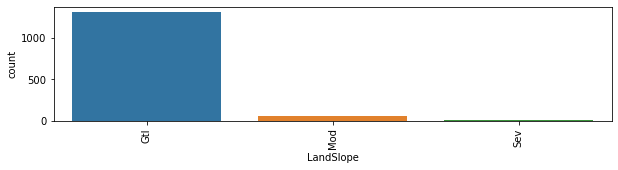

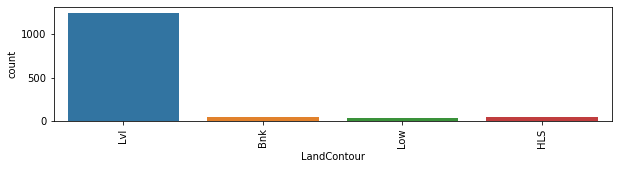

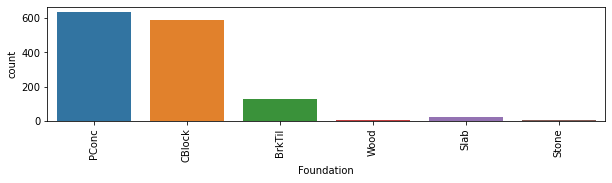

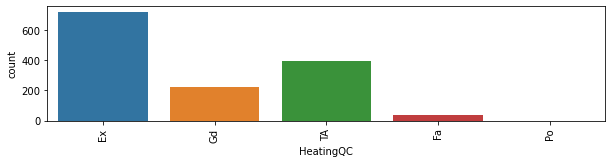

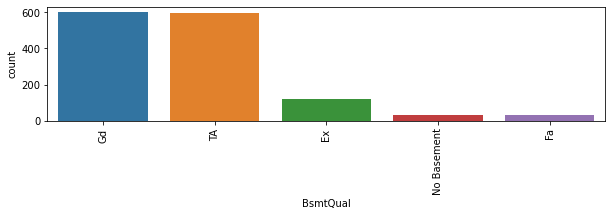

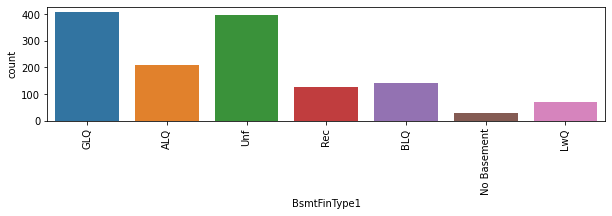

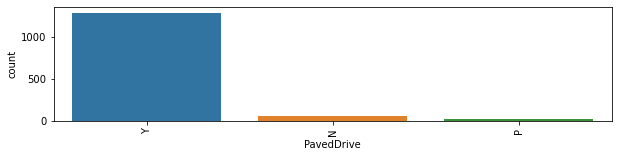

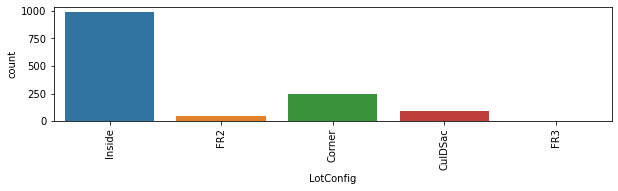

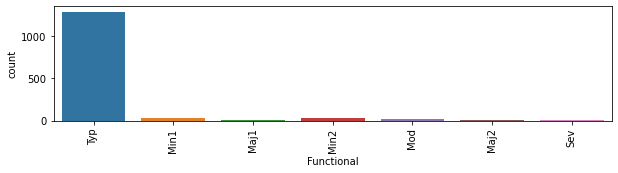

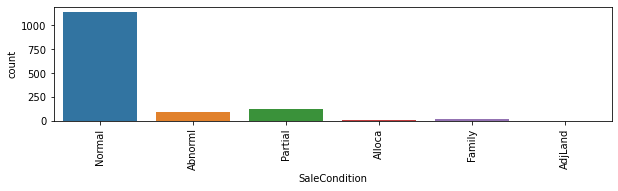

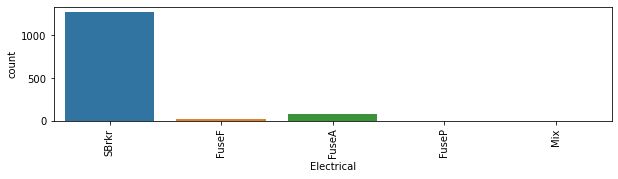

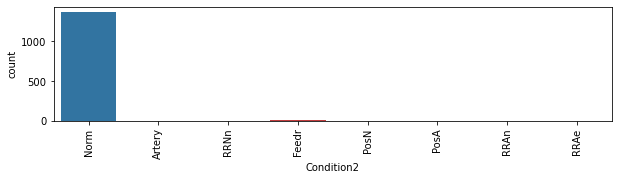

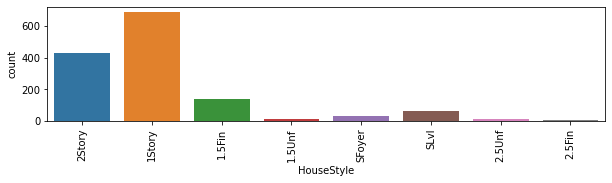

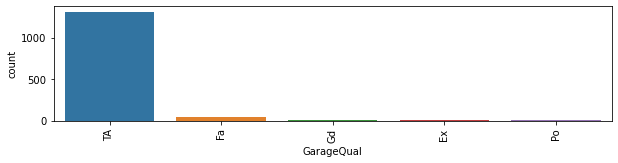

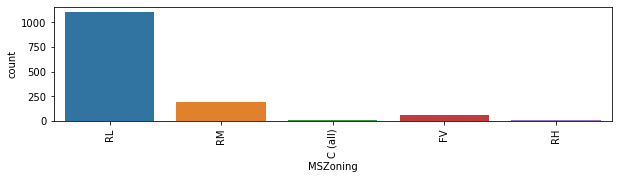

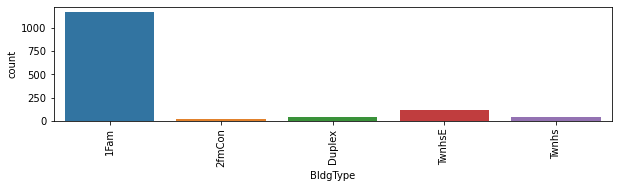

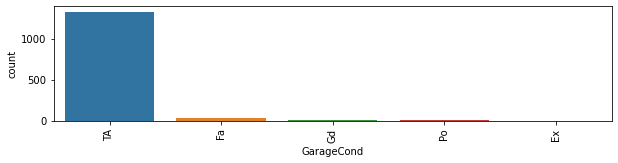

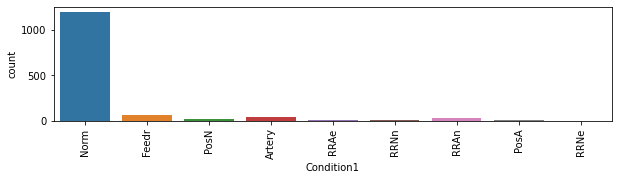

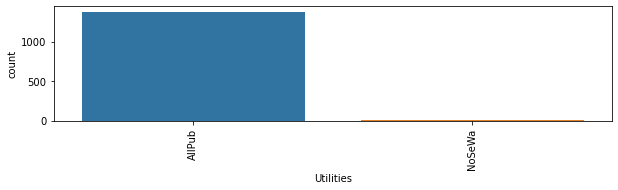

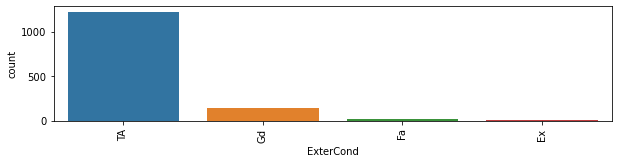

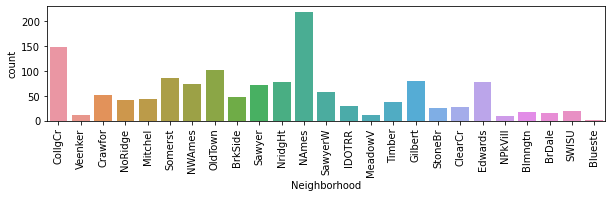

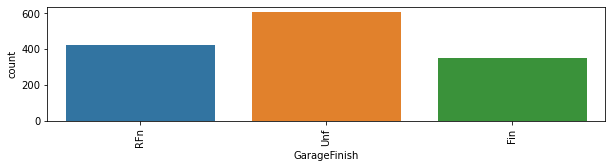

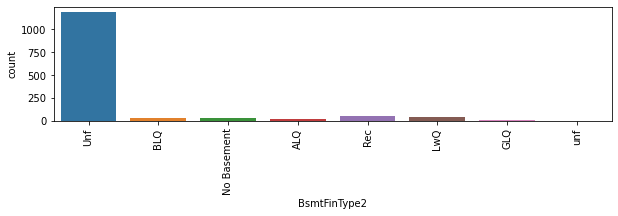

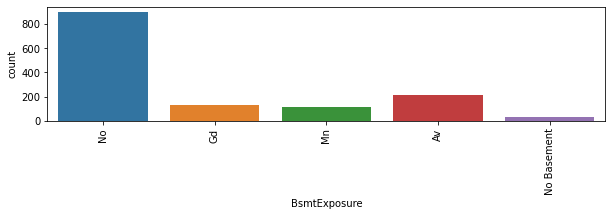

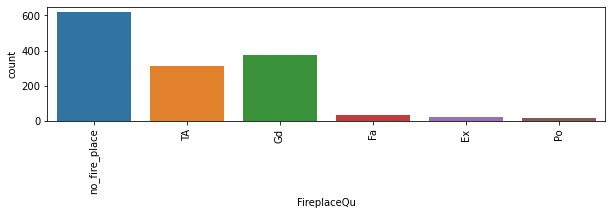

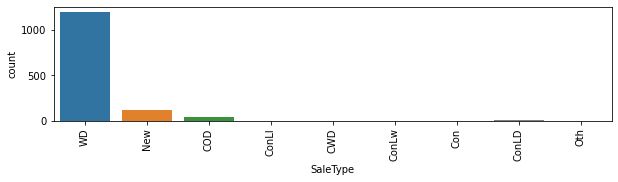

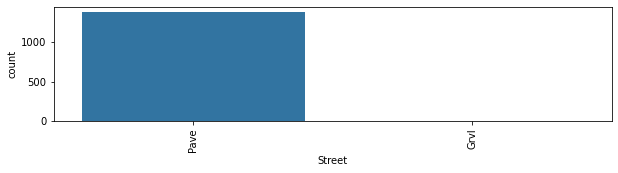

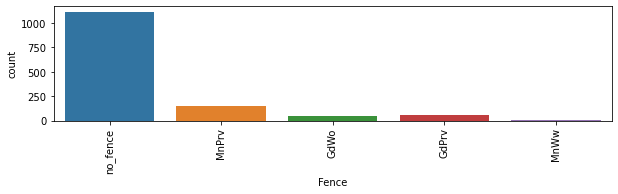

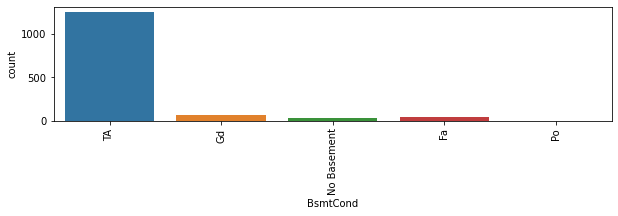

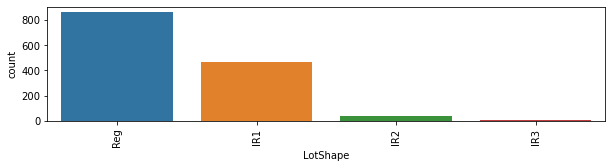

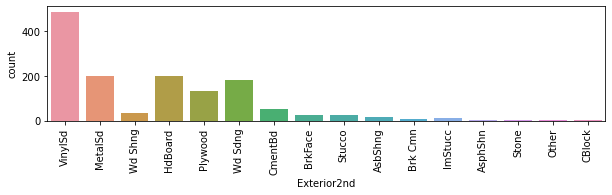

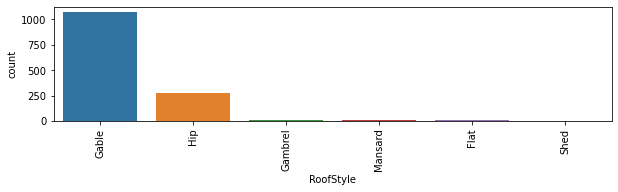

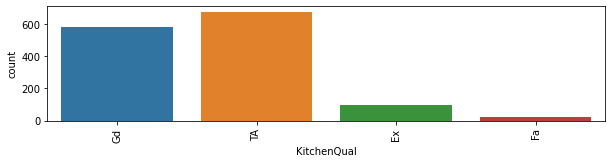

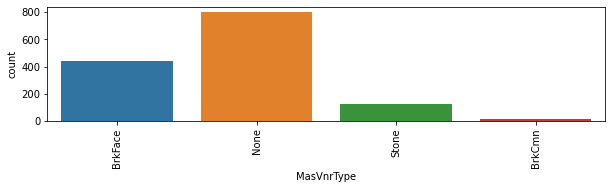

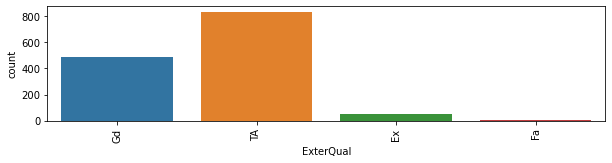

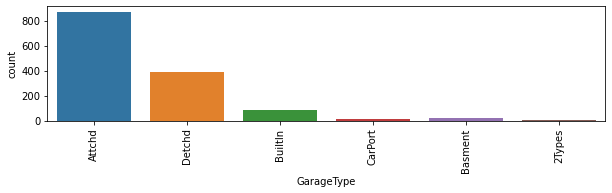

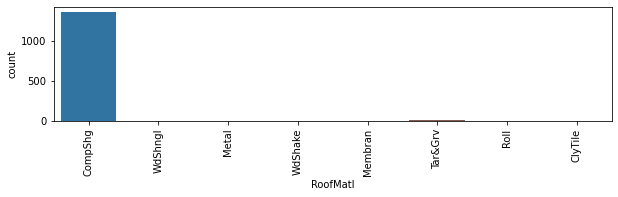

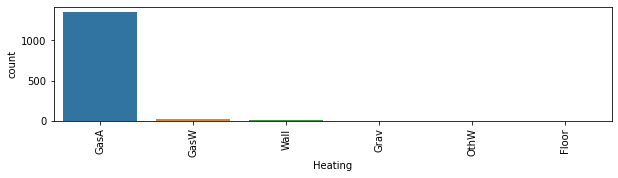

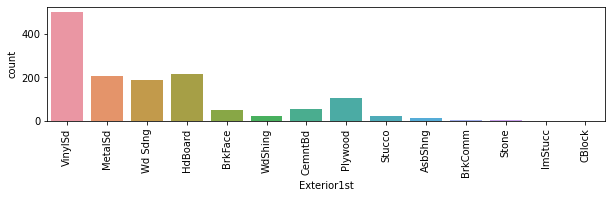

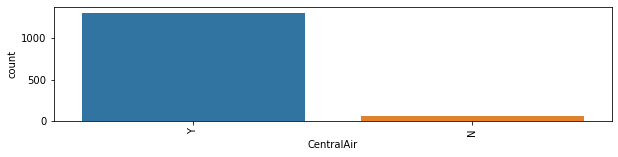

In [55]:
# Plot the categorical column values

count=1 #plot number
for col in cat_cols:
    
    plt.figure(figsize=(10,50))
    plt.subplot(round(len(cat_cols)/2),1,count)
    sns.countplot(data[col])
    plt.xticks(rotation=90)
    count=+1
plt.show()

We could see many columns skewed towards one value.

Lets validate in percentage of values in each column.

In [56]:
for col in cat_cols:
    print(100*data[col].value_counts()/len(data[col]))
    print("=====================================")

Gtl    94.706309
Mod     4.423495
Sev     0.870196
Name: LandSlope, dtype: float64
Lvl    90.210297
Bnk     3.915881
HLS     3.480783
Low     2.393038
Name: LandContour, dtype: float64
PConc     45.902828
CBlock    42.639594
BrkTil     9.354605
Slab       1.450326
Stone      0.435098
Wood       0.217549
Name: Foundation, dtype: float64
Ex    52.211748
TA    28.716461
Gd    16.098622
Fa     2.900653
Po     0.072516
Name: HeatingQC, dtype: float64
Gd             43.582306
TA             43.147208
Ex              8.774474
Fa              2.320522
No Basement     2.175489
Name: BsmtQual, dtype: float64
GLQ            29.586657
Unf            28.716461
ALQ            15.155910
BLQ            10.224801
Rec             9.137056
LwQ             5.003626
No Basement     2.175489
Name: BsmtFinType1, dtype: float64
Y    93.763597
N     4.205946
P     2.030457
Name: PavedDrive, dtype: float64
Inside     71.646120
Corner     18.129079
CulDSac     6.744017
FR2         3.190718
FR3         0.290065
N

Below columns are highly skewed towards one value. So, we can remove them from our dataset.
- "GarageQual","Electrical","LandSlope","LandContour","GarageCond","PavedDrive","Utilities","RoofMatl","Street","Condition2"

In [57]:
data.drop(["GarageQual","Electrical","LandSlope","LandContour","GarageCond","PavedDrive","Utilities","RoofMatl","Street","Condition2"],axis=1,inplace=True)

Below columns have many values with lesser representatin. So, we can add them and create new value.
- "Exterior2nd","Condition1","SaleType","Neighborhood","Exterior1st","RoofStyle","BsmtFinType2"

In [58]:
# Column - "Exterior2nd"
100*data["Exterior2nd"].value_counts()/len(data["Exterior2nd"])

VinylSd    35.315446
HdBoard    14.575780
MetalSd    14.575780
Wd Sdng    13.125453
Plywood     9.644670
CmentBd     3.843365
Wd Shng     2.393038
BrkFace     1.740392
Stucco      1.740392
AsbShng     1.160261
ImStucc     0.725163
Brk Cmn     0.507614
Stone       0.362582
AsphShn     0.145033
Other       0.072516
CBlock      0.072516
Name: Exterior2nd, dtype: float64

In [59]:
# Replace the values which are having less than 5% to the value "other"
values_to_replace = (100*data["Exterior2nd"].value_counts()/len(data["Exterior2nd"]))[(100*data["Exterior2nd"].value_counts()/len(data["Exterior2nd"]))<5].index
values_to_replace

Index(['CmentBd', 'Wd Shng', 'BrkFace', 'Stucco', 'AsbShng', 'ImStucc',
       'Brk Cmn', 'Stone', 'AsphShn', 'Other', 'CBlock'],
      dtype='object')

In [60]:
for value in values_to_replace:
    data['Exterior2nd'][data['Exterior2nd']==value]="others"

In [61]:
# Column - "Condition1"
100*data["Condition1"].value_counts()/len(data["Condition1"])

Norm      86.656998
Feedr      5.003626
Artery     3.190718
RRAn       1.885424
PosN       1.377810
RRAe       0.797679
PosA       0.580131
RRNn       0.362582
RRNe       0.145033
Name: Condition1, dtype: float64

In [62]:
# Replace the values which are having less than 4% to the value "other"
values_to_replace = (100*data["Condition1"].value_counts()/len(data["Condition1"]))[(100*data["Condition1"].value_counts()/len(data["Condition1"]))<4].index
values_to_replace

Index(['Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe'], dtype='object')

In [63]:
for value in values_to_replace:
    data['Condition1'][data['Condition1']==value]="others"

In [64]:
# Column - "SaleType"
100*data["SaleType"].value_counts()/len(data["SaleType"])

WD       86.584482
New       8.701958
COD       3.118202
ConLD     0.507614
ConLI     0.290065
CWD       0.290065
ConLw     0.290065
Con       0.145033
Oth       0.072516
Name: SaleType, dtype: float64

In [65]:
# Replace the values which are having less than 4% to the value "other"
values_to_replace = (100*data["SaleType"].value_counts()/len(data["SaleType"]))[(100*data["SaleType"].value_counts()/len(data["SaleType"]))<4].index
values_to_replace

Index(['COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'], dtype='object')

In [66]:
for value in values_to_replace:
    data['SaleType'][data['SaleType']==value]="others"

In [67]:
# Column - "Neighborhood"
100*data["Neighborhood"].value_counts()/len(data["Neighborhood"])

NAmes      15.881073
CollgCr    10.732415
OldTown     7.324148
Somerst     6.236403
Gilbert     5.728789
Edwards     5.656273
NridgHt     5.583756
NWAmes      5.293691
Sawyer      5.148658
SawyerW     4.205946
Crawfor     3.698332
BrkSide     3.480783
Mitchel     3.190718
NoRidge     2.973169
Timber      2.755620
IDOTRR      2.102973
ClearCr     1.957941
StoneBr     1.812908
SWISU       1.450326
Blmngtn     1.232777
BrDale      1.087745
MeadowV     0.870196
Veenker     0.797679
NPkVill     0.652647
Blueste     0.145033
Name: Neighborhood, dtype: float64

In [68]:
# Replace the values which are having less than 5% to the value "other"
values_to_replace = (100*data["Neighborhood"].value_counts()/len(data["Neighborhood"]))[(100*data["Neighborhood"].value_counts()/len(data["Neighborhood"]))<5].index
values_to_replace

Index(['SawyerW', 'Crawfor', 'BrkSide', 'Mitchel', 'NoRidge', 'Timber',
       'IDOTRR', 'ClearCr', 'StoneBr', 'SWISU', 'Blmngtn', 'BrDale', 'MeadowV',
       'Veenker', 'NPkVill', 'Blueste'],
      dtype='object')

In [69]:
for value in values_to_replace:
    data['Neighborhood'][data['Neighborhood']==value]="others"

In [70]:
# Column - "Exterior1st"
100*data["Exterior1st"].value_counts()/len(data["Exterior1st"])

VinylSd    36.113125
HdBoard    15.591008
MetalSd    14.865845
Wd Sdng    13.560551
Plywood     7.614213
CemntBd     3.915881
BrkFace     3.553299
Stucco      1.667875
WdShing     1.595359
AsbShng     1.087745
Stone       0.145033
BrkComm     0.145033
CBlock      0.072516
ImStucc     0.072516
Name: Exterior1st, dtype: float64

In [71]:
# Replace the values which are having less than 5% to the value "other"
values_to_replace = (100*data["Exterior1st"].value_counts()/len(data["Exterior1st"]))[(100*data["Exterior1st"].value_counts()/len(data["Exterior1st"]))<5].index
values_to_replace

Index(['CemntBd', 'BrkFace', 'Stucco', 'WdShing', 'AsbShng', 'Stone',
       'BrkComm', 'CBlock', 'ImStucc'],
      dtype='object')

In [72]:
for value in values_to_replace:
    data['Exterior1st'][data['Exterior1st']==value]="others"

In [73]:
# Column - "RoofStyle"
100*data["RoofStyle"].value_counts()/len(data["RoofStyle"])

Gable      77.592458
Hip        20.232052
Flat        0.870196
Gambrel     0.725163
Mansard     0.435098
Shed        0.145033
Name: RoofStyle, dtype: float64

In [74]:
# Replace the values which are having less than 5% to the value "other"
values_to_replace = (100*data["RoofStyle"].value_counts()/len(data["RoofStyle"]))[(100*data["RoofStyle"].value_counts()/len(data["RoofStyle"]))<5].index
values_to_replace

Index(['Flat', 'Gambrel', 'Mansard', 'Shed'], dtype='object')

In [75]:
for value in values_to_replace:
    data['RoofStyle'][data['RoofStyle']==value]="others"

In [76]:
# Column - "Exterior1st"
100*data["BsmtFinType2"].value_counts()/len(data["BsmtFinType2"])

Unf            86.004351
Rec             3.843365
LwQ             3.335751
BLQ             2.320522
No Basement     2.175489
ALQ             1.377810
GLQ             0.870196
unf             0.072516
Name: BsmtFinType2, dtype: float64

In [77]:
# Replace the values which are having less than 3% to the value "other"
values_to_replace = (100*data["BsmtFinType2"].value_counts()/len(data["BsmtFinType2"]))[(100*data["BsmtFinType2"].value_counts()/len(data["BsmtFinType2"]))<3].index
values_to_replace

Index(['BLQ', 'No Basement', 'ALQ', 'GLQ', 'unf'], dtype='object')

In [78]:
for value in values_to_replace:
    data['BsmtFinType2'][data['BsmtFinType2']==value]="others"

In [79]:
# find categorical columns again from the current dataset
cat_cols = set(data.columns)-num_cols
cat_cols

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageFinish',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'RoofStyle',
 'SaleCondition',
 'SaleType'}

###### Lets validate numerial columns

Correlation between the columns

In [80]:
data[num_cols].corr()

,TotRmsAbvGrd,YearBuilt,GarageArea,WoodDeckSF,GrLivArea,LotFrontage,HalfBath,LowQualFinSF,MasVnrArea,3SsnPorch,MiscVal,2ndFlrSF,KitchenAbvGr,EnclosedPorch,OverallCond,LotArea,YearRemodAdd,OverallQual,SalePrice,TotalBsmtSF,Fireplaces,BsmtHalfBath,MoSold,1stFlrSF,BedroomAbvGr,MSSubClass,BsmtFinSF1,BsmtFullBath,PoolArea,GarageYrBlt,BsmtUnfSF,FullBath,ScreenPorch,Id,GarageCars,YrSold,OpenPorchSF,BsmtFinSF2
TotRmsAbvGrd,1.000000,0.101539,0.362053,0.165911,0.820975,0.316341,0.347336,0.090634,0.282211,-0.009653,0.023505,0.612217,0.234492,0.003937,-0.068573,0.185724,0.173375,0.426834,0.537609,0.268188,0.334207,-0.016778,0.036945,0.396528,0.665963,0.021816,0.044389,-0.050817,0.086578,0.148112,0.233023,0.546319,0.056509,0.024639,0.400170,-0.038735,0.238234,-0.041156
YearBuilt,0.101539,1.000000,0.444951,0.213102,0.194663,0.103629,0.235722,-0.159333,0.297720,0.026285,-0.033892,0.017152,-0.164898,-0.378630,-0.403602,-0.005921,0.618058,0.572082,0.574577,0.376977,0.113546,-0.054074,0.008620,0.258161,-0.071794,0.060041,0.229643,0.181559,0.001167,0.825667,0.157525,0.482739,-0.069431,-0.020228,0.523349,-0.006809,0.220775,-0.066657
GarageArea,0.362053,0.444951,1.000000,0.202534,0.478811,0.332997,0.129413,0.015119,0.367728,0.023664,-0.029811,0.128010,0.023795,-0.109105,-0.196678,0.167622,0.382323,0.528107,0.611875,0.491248,0.207316,-0.043608,0.021800,0.495321,0.087321,-0.066485,0.289128,0.192149,0.061760,0.564567,0.201121,0.422969,0.019341,0.012683,0.831481,-0.026080,0.273570,-0.047320
WoodDeckSF,0.165911,0.213102,0.202534,1.000000,0.243985,0.070062,0.095782,-0.006935,0.152984,-0.036409,-0.010342,0.089892,-0.094343,-0.127077,-0.005638,0.166600,0.204308,0.227272,0.324390,0.223545,0.189866,0.042690,0.025508,0.225905,0.052647,-0.009195,0.194729,0.169312,0.072911,0.224577,-0.005322,0.181549,-0.082740,-0.031905,0.205853,0.018460,0.065364,0.063257
GrLivArea,0.820975,0.194663,0.478811,0.243985,1.000000,0.360976,0.413656,0.101811,0.388460,0.017073,-0.001013,0.683441,0.089473,0.020485,-0.092217,0.257243,0.278864,0.589584,0.702123,0.442146,0.463537,-0.018373,0.048398,0.554620,0.512312,0.072673,0.208016,0.037976,0.174681,0.231197,0.226614,0.624200,0.095632,0.002616,0.483899,-0.040162,0.341749,-0.019636
LotFrontage,0.316341,0.103629,0.332997,0.070062,0.360976,1.000000,0.038638,0.010952,0.177510,0.061222,-0.002044,0.066604,-0.002178,0.013455,-0.042754,0.299049,0.081629,0.227286,0.333707,0.359475,0.226796,-0.000753,0.017868,0.407431,0.240810,-0.357516,0.219082,0.103452,0.185169,0.066497,0.111396,0.170518,0.032479,-0.011059,0.270499,0.010251,0.146422,0.040960
HalfBath,0.347336,0.235722,0.129413,0.095782,0.413656,0.038638,1.000000,0.001561,0.186688,-0.008238,0.002772,0.616881,-0.088301,-0.086005,-0.062217,0.005700,0.182239,0.264944,0.300650,-0.074837,0.195863,-0.012554,-0.013674,-0.145909,0.237027,0.197925,-0.007579,-0.042676,0.021217,0.196785,-0.052574,0.129800,0.067509,-0.008611,0.198254,-0.016779,0.211717,-0.035581
LowQualFinSF,0.090634,-0.159333,0.015119,-0.006935,0.101811,0.010952,0.001561,1.000000,-0.060338,-0.000254,-0.000251,0.045547,-0.020214,0.049594,0.043216,0.010177,-0.063419,-0.014550,-0.020925,-0.050762,0.003349,0.004331,-0.027381,-0.018854,0.056561,0.020161,-0.050021,-0.028006,0.080516,-0.036363,-0.000859,-0.023292,0.045358,-0.047133,-0.017163,-0.022023,0.020296,0.007453
MasVnrArea,0.282211,0.297720,0.367728,0.152984,0.388460,0.177510,0.186688,-0.060338,1.000000,0.016385,-0.029014,0.169468,-0.019110,-0.103606,-0.131793,0.096631,0.172021,0.399167,0.422196,0.355891,0.234136,0.019282,-0.011730,0.334861,0.106750,0.031064,0.253004,0.083784,0.010304,0.248397,0.116063,0.270468,0.053219,-0.058166,0.360940,-0.005634,0.128867,-0.076056
3SsnPorch,-0.009653,0.026285,0.023664,-0.036409,0.017073,0.061222,-0.008238,-0.000254,0.016385,1.000000,0.000504,-0.026654,-0.023486,-0.036961,0.026735,0.018443,0.043737,0.024314,0.049530,0.034016,0.006232,0.035611,0.029868,0.053200,-0.026018,-0.043958,0.023903,-0.001370,-0.008465,0.023544,0.020335,0.033290,-0.033367,-0.04846

Plot heatmap for the correlation matrix

<AxesSubplot:>

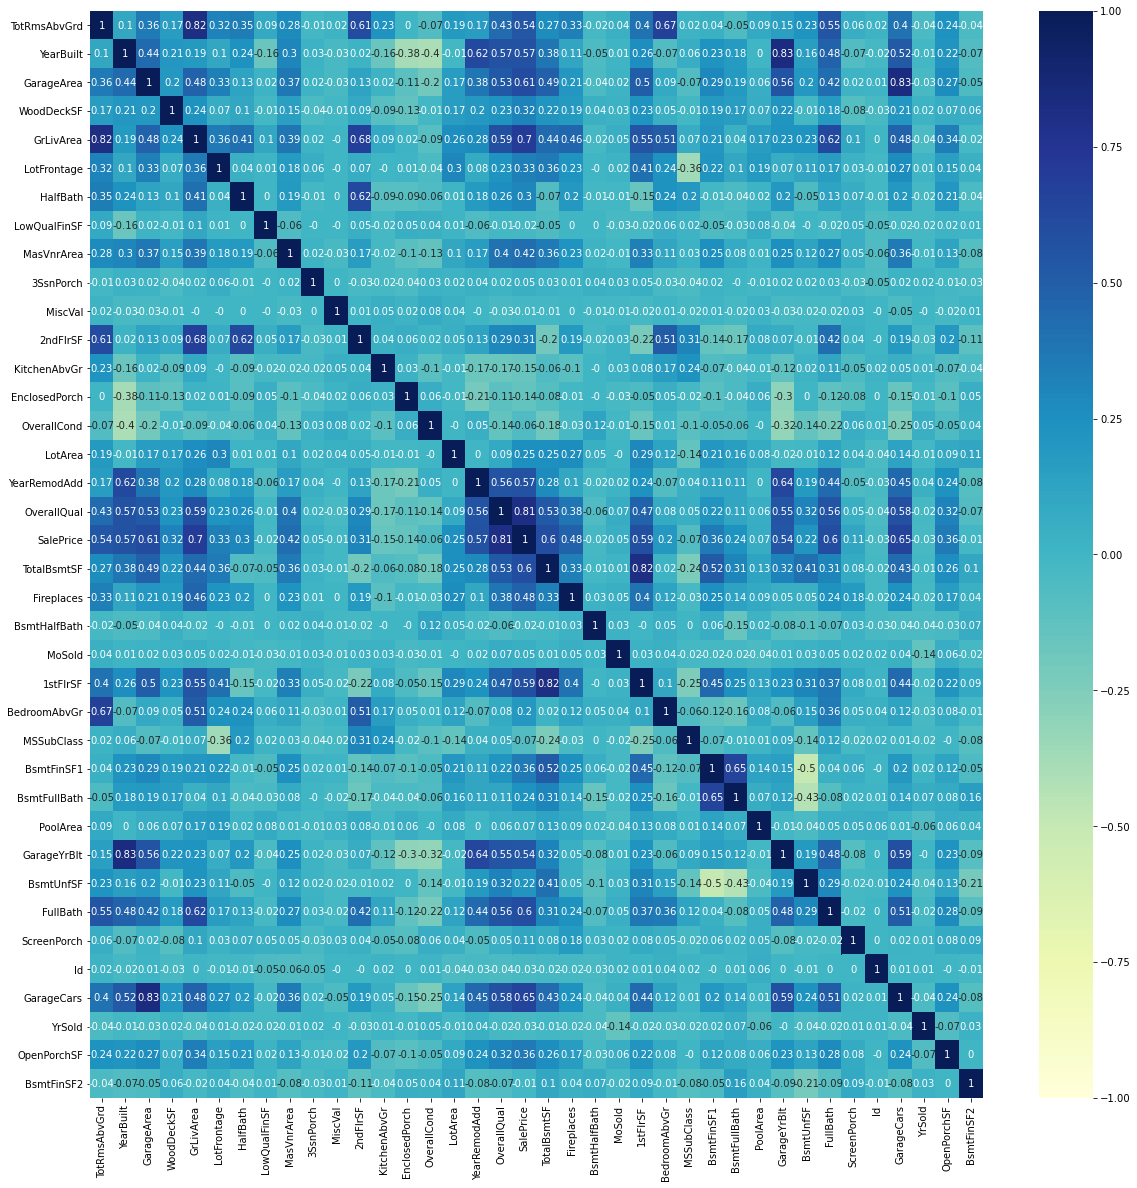

In [81]:
plt.figure(figsize=(20,20))
sns.heatmap(round(data[num_cols].corr(),2),annot=True,vmin=-1,vmax=1,cmap="YlGnBu")

- No variables are correlated with each order with the value more than 0.85

Correlation with target variable

In [82]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.813365
GrLivArea        0.702123
GarageCars       0.653774
GarageArea       0.611875
TotalBsmtSF      0.601908
FullBath         0.596586
1stFlrSF         0.586865
YearBuilt        0.574577
YearRemodAdd     0.570457
GarageYrBlt      0.541073
TotRmsAbvGrd     0.537609
Fireplaces       0.475556
MasVnrArea       0.422196
BsmtFinSF1       0.360907
OpenPorchSF      0.355630
LotFrontage      0.333707
WoodDeckSF       0.324390
2ndFlrSF         0.314443
HalfBath         0.300650
LotArea          0.247431
BsmtFullBath     0.235062
BsmtUnfSF        0.222098
BedroomAbvGr     0.197057
ScreenPorch      0.108410
PoolArea         0.069659
MoSold           0.052943
3SsnPorch        0.049530
BsmtFinSF2      -0.010895
MiscVal         -0.012569
BsmtHalfBath    -0.018958
LowQualFinSF    -0.020925
Id              -0.025443
YrSold          -0.034390
OverallCond     -0.064651
MSSubClass      -0.068748
EnclosedPorch   -0.141448
KitchenAbvGr    -0.154321
Name: SalePr

###### Handling the variables which are having data "year"

- Columns: "YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"

In [83]:
data[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1379 non-null   int64  
 1   YearRemodAdd  1379 non-null   int64  
 2   GarageYrBlt   1379 non-null   float64
 3   YrSold        1379 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 86.2 KB


We can create age column and calculate the difference between Year build and year sold.

Then, we can drop these columns.

In [84]:
data['Age'] = (data["YrSold"]-data["YearBuilt"])

In [85]:
# drop the columns which are having year values

data.drop(["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"],axis=1,inplace=True)

In [86]:
data.shape

(1379, 65)

In [87]:
# Find the numerical columns again
num_cols = data.describe().columns
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Age'],
      dtype='object')

__Box plots for checking outliers__

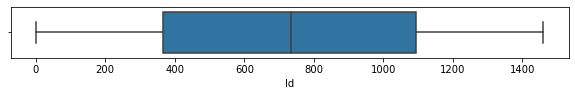

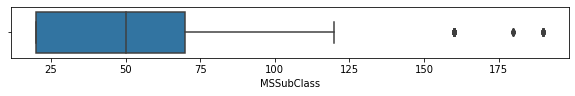

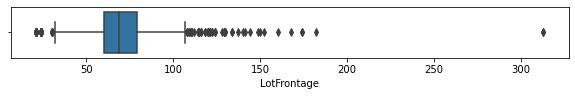

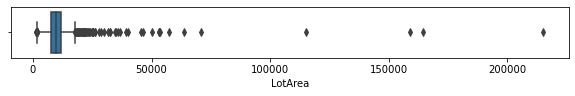

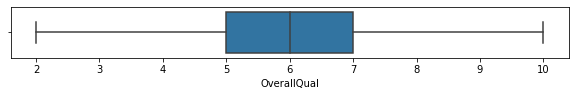

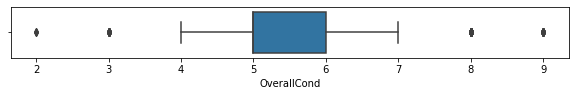

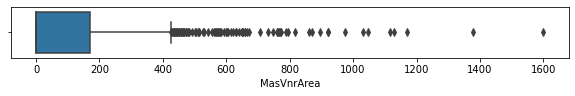

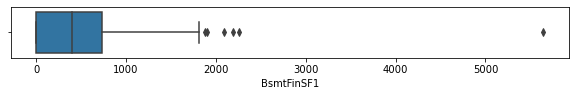

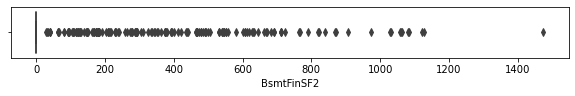

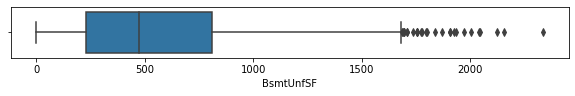

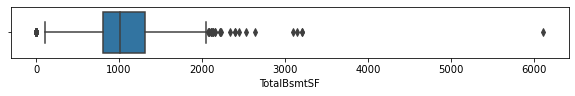

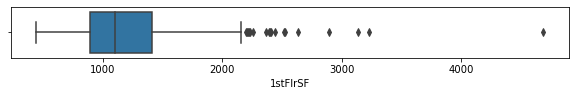

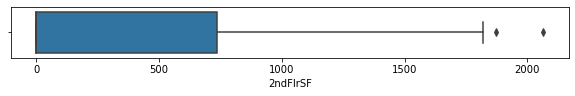

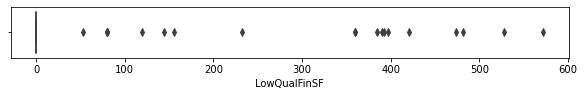

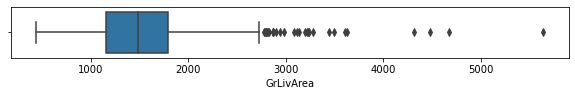

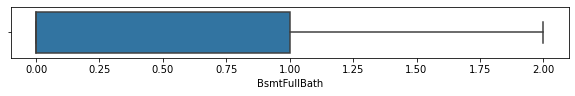

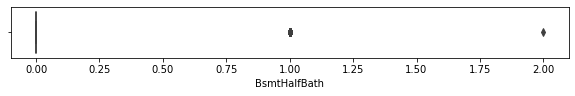

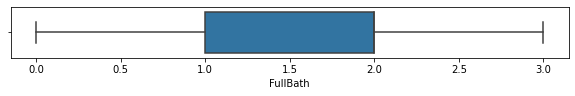

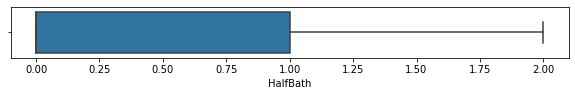

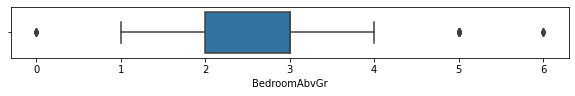

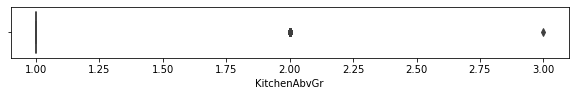

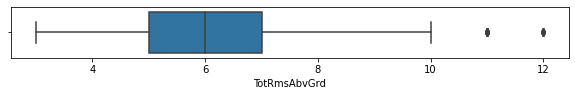

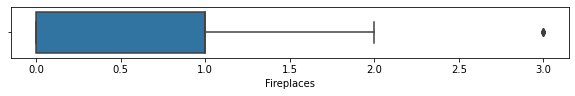

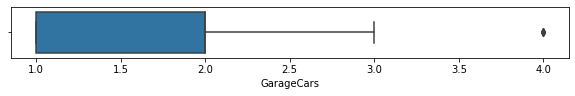

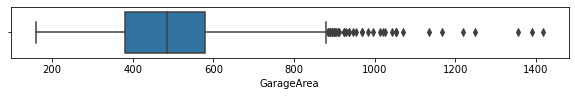

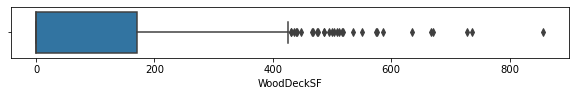

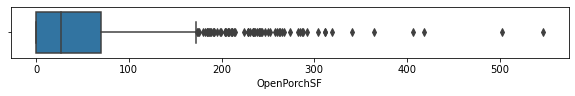

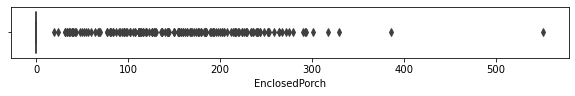

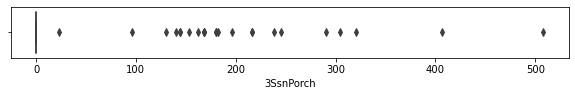

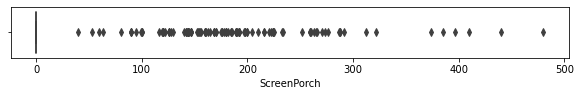

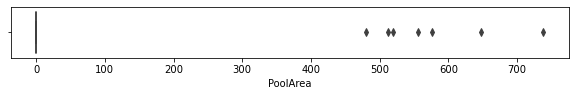

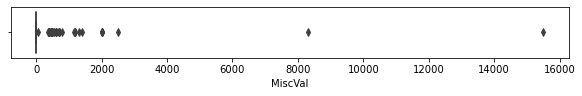

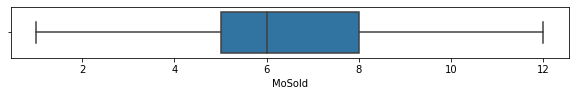

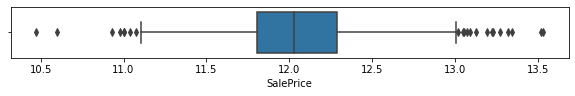

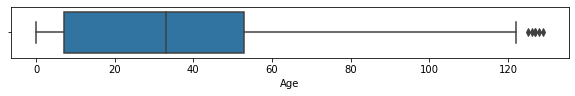

In [88]:
count=1 #plot number
for col in num_cols:
    plt.figure(figsize=(10,20))
    plt.subplot(round(len(num_cols)/2),1,count)
    sns.boxplot(data[col])
    count=+1
plt.show()

As per the above boxplots on numerical columns, there are no outliers present in the columns "OverallQual", "BsmtFullBath","FullBath", "HalfBath" and "MoSold".

Lets validate the balance numerical columns and treat outliers.

__Column: Id__

In [89]:
len(data['Id'].unique())

1379

- Column "Id" denoting that record numbers. So, we can remove these columns from the analysis.

In [90]:
data.drop('Id',axis=1,inplace=True)

__Column: "MSSubClass"__

In [91]:
data["MSSubClass"].describe([0.5,0.9,0.95])

count    1379.000000
mean       56.022480
std        41.026897
min        20.000000
50%        50.000000
90%       120.000000
95%       160.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [92]:
# Validate number of records having the value more than 95% value
len(data[data["MSSubClass"]>data["MSSubClass"].describe([0.95])[5]])

27

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

The values in the column "MSSubClass" are representing the categorical details. So, we can convert the numverical values to categorical representation.

In [93]:
#data["MSSubClass"].value_counts()

In [94]:
#Map the numberical value with their categorical values.

data["MSSubClass"] = data["MSSubClass"].map({
    20:"1-STORY 1946 & NEWER ALL STYLES",
    30:"1-STORY 1945 & OLDER",
    40:"1-STORY W/FINISHED ATTIC ALL AGES",
    45:"1-1/2 STORY - UNFINISHED ALL AGES",
    50:"1-1/2 STORY FINISHED ALL AGES",
    60:"2-STORY 1946 & NEWER",
    70:"2-STORY 1945 & OLDER",
    75:"2-1/2 STORY ALL AGES",
    80:"SPLIT OR MULTI-LEVEL",
    85:"SPLIT FOYER",
    90:"DUPLEX - ALL STYLES AND AGES",
   120:"1-STORY PUD - 1946 & NEWER",
   150:"1-1/2 STORY PUD - ALL AGES",
   160:"2-STORY PUD - 1946 & NEWER",
   180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
   190:"FAMILY CONVERSION - ALL STYLES AND AGES"
})

In [95]:
data["MSSubClass"].value_counts()

1-STORY 1946 & NEWER ALL STYLES            521
2-STORY 1946 & NEWER                       299
1-1/2 STORY FINISHED ALL AGES              131
1-STORY PUD - 1946 & NEWER                  87
2-STORY PUD - 1946 & NEWER                  61
SPLIT OR MULTI-LEVEL                        58
2-STORY 1945 & OLDER                        57
1-STORY 1945 & OLDER                        51
DUPLEX - ALL STYLES AND AGES                40
FAMILY CONVERSION - ALL STYLES AND AGES     21
SPLIT FOYER                                 20
2-1/2 STORY ALL AGES                        14
1-1/2 STORY - UNFINISHED ALL AGES            9
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER      6
1-STORY W/FINISHED ATTIC ALL AGES            4
Name: MSSubClass, dtype: int64

__Column: LotFrontage__

- Linear feet of street connected to property

In [96]:
data["LotFrontage"].describe([0.75,0.9,0.95,0.99])

count    1379.000000
mean       70.375635
std        21.940932
min        21.000000
50%        69.000000
75%        79.000000
90%        92.200000
95%       104.100000
99%       134.660000
max       313.000000
Name: LotFrontage, dtype: float64

In [97]:
len(data[data["LotFrontage"]>data["LotFrontage"].describe([0.99])[5]])

14

Area having outlier values are obvious. Either we can cap to 99% percentile or we can have the original values.

We can use the original values instead of capping them.

__Column: "LotArea"__

- Lot size in square feet


In [98]:
data["LotArea"].describe([0.95,0.99])

count      1379.000000
mean      10695.812183
std       10214.702133
min        1300.000000
50%        9591.000000
95%       17506.900000
99%       39321.800000
max      215245.000000
Name: LotArea, dtype: float64

In [99]:
len(data[data["LotArea"]>data["LotArea"].describe([0.99])[5]])

14

Lets have the original values for our analysis.

__Column: OverallCond__

Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
       
Column have the categorical representation in numerical format.

In [100]:
data["OverallCond"].value_counts()

5    794
6    237
7    187
8     68
4     51
9     20
3     19
2      3
Name: OverallCond, dtype: int64

__Columns denoting area__
- "MasVnrArea" : Masonry veneer area in square feet
- "BsmtFinSF1" : Type 1 finished square feet
- "BsmtFinSF2" : Type 2 finished square feet
- "BsmtUnfSF" : Unfinished square feet of basement area
- "TotalBsmtSF" : Total square feet of basement area
- "1stFlrSF" : First Floor square feet
- "2ndFlrSF" : Second floor square feet
- "LowQualFinSF" : Low quality finished square feet (all floors)
- "GrLivArea" : Above grade (ground) living area square feet
- "GarageCars" : Size of garage in car capacity
- "GarageArea": Size of garage in square feet
- "WoodDeckSF": Wood deck area in square feet
- "OpenPorchSF": Open porch area in square feet
- "EnclosedPorch": Enclosed porch area in square feet
- "3SsnPorch": Three season porch area in square feet
- "ScreenPorch": Screen porch area in square feet
- "PoolArea": Pool area in square feet

We can use the original values for the columns which are denoting area.

In [101]:
data["MiscVal"].value_counts()

0        1330
400        10
500         8
700         5
600         4
2000        4
450         3
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
Name: MiscVal, dtype: int64

We can keep the miscellaneous feature value as same.

Lets validate the balance variables.

In [102]:
data["BsmtFullBath"].value_counts()

0    798
1    568
2     13
Name: BsmtFullBath, dtype: int64

In [103]:
data["BsmtHalfBath"].value_counts()

0    1299
1      79
2       1
Name: BsmtHalfBath, dtype: int64

In [104]:
data["FullBath"].value_counts()

2    746
1    594
3     31
0      8
Name: FullBath, dtype: int64

In [105]:
data["HalfBath"].value_counts()

0    842
1    528
2      9
Name: HalfBath, dtype: int64

In [106]:
data["OverallQual"].value_counts()

5     365
6     362
7     318
8     167
4      90
9      43
10     18
3      14
2       2
Name: OverallQual, dtype: int64

In [107]:
data["BedroomAbvGr"].value_counts()

3    775
2    334
4    199
1     42
5     18
0      6
6      5
Name: BedroomAbvGr, dtype: int64

In [108]:
data["KitchenAbvGr"].value_counts()

1    1327
2      51
3       1
Name: KitchenAbvGr, dtype: int64

In [109]:
data["TotRmsAbvGrd"].value_counts()

6     387
7     320
5     254
8     177
4      84
9      72
10     45
11     18
3      12
12     10
Name: TotRmsAbvGrd, dtype: int64

In [110]:
data["Fireplaces"].value_counts()

1    642
0    618
2    114
3      5
Name: Fireplaces, dtype: int64

In [111]:
data["MoSold"].value_counts()

6     243
7     223
5     193
4     131
8     114
3      97
10     87
11     77
9      56
12     54
1      53
2      51
Name: MoSold, dtype: int64

In [112]:
data["Age"].value_counts()

1      100
0       62
4       40
2       39
3       36
      ... 
103      1
102      1
79       1
98       1
129      1
Name: Age, Length: 120, dtype: int64

###### Data retained after EDA

In [113]:
data.shape

(1379, 64)

In [114]:
100*1379/1460

94.45205479452055

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1379 non-null   object 
 1   MSZoning       1379 non-null   object 
 2   LotFrontage    1379 non-null   float64
 3   LotArea        1379 non-null   int64  
 4   LotShape       1379 non-null   object 
 5   LotConfig      1379 non-null   object 
 6   Neighborhood   1379 non-null   object 
 7   Condition1     1379 non-null   object 
 8   BldgType       1379 non-null   object 
 9   HouseStyle     1379 non-null   object 
 10  OverallQual    1379 non-null   int64  
 11  OverallCond    1379 non-null   int64  
 12  RoofStyle      1379 non-null   object 
 13  Exterior1st    1379 non-null   object 
 14  Exterior2nd    1379 non-null   object 
 15  MasVnrType     1379 non-null   object 
 16  MasVnrArea     1379 non-null   float64
 17  ExterQual      1379 non-null   object 
 18  ExterCon

###### Creating dummy variables for categorical columns

In [116]:
# numerical columns
num_cols = set(data.describe().columns)
num_cols

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Age',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF'}

In [117]:
# Categorical columns
cat_cols = set(data.columns)-num_cols
cat_cols

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageFinish',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LotConfig',
 'LotShape',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'RoofStyle',
 'SaleCondition',
 'SaleType'}

In [118]:
data_dummy = pd.get_dummies(data[cat_cols],drop_first=True)
data_dummy.head()

,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Norm,Condition1_others,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_others,GarageFinish_RFn,GarageFinish_Unf,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_others,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_no_fire_place,SaleType_WD,SaleType_others,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_no_fence,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,LotShape_IR2,LotShape_IR3,LotShape_Reg,RoofStyle_Hip,RoofStyle_others,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_others,CentralAir_Y
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [119]:
# Concatenate the dummy variables with the dataset and remove the original columns
data_model = pd.concat([data,data_dummy],axis=1)
data_model.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Norm,Condition1_others,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_others,GarageFinish_RFn,GarageFinish_Unf,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_others,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_no_fire_place,SaleType_WD,SaleType_others,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_no_fence,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,LotShape_IR2,LotShape_IR3,LotShape_Reg,RoofStyle_Hip,RoofStyle_others,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_others,CentralAir_Y
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,no_fire_place,Attchd,RFn,2,548,0,61,0,0,0,0,no_fence,0,2,WD,Normal,12.247694,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,others,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attch

In [120]:
data_model.drop(cat_cols,axis=1,inplace=True)

In [121]:
data_model.shape

(1379, 169)

### Train Test split

In [122]:
X = data_model.drop('SalePrice', axis=1)
y = data_model['SalePrice']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (965, 168)
X_test Shape: (414, 168)
y_train Shape: (965,)
y_test Shape: (414,)


### Scaling

In [124]:
scaler = StandardScaler()

In [125]:
#Scaling the numerical columns in training dataset
num_cols = X_train.describe().columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Norm,Condition1_others,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_others,GarageFinish_RFn,GarageFinish_Unf,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_others,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_no_fire_place,SaleType_WD,SaleType_others,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_no_fence,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,LotShape_IR2,LotShape_IR3,LotShape_Reg,RoofStyle_Hip,RoofStyle_others,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_others,CentralAir_Y
1269,0.362494,0.060733,-0.883308,-0.567737,0.395997,0.022015,-0.29546,-0.346509,-0.429891,-0.765015,0.674151,-0.090266,-0.013703,-0.835581,-0.248206,-1.083687,1.217132,0.159800,-0.170077,0.280815,-1.007604,-1.366076,-0.992770,-0.772444,-0.723931,-0.351336,-0.129832,-0.264505,-0.078145,-0.083718,0.247538,0.483424,-0.17602,-0.440803,-0.032208,1.575993,1.161005,-0.909754,-0.125656,-0.064516,-0.055844,-0.145479,-0.859499,-0.152741,1.120122,2.877298,-0.629704,-0.231287,-0.152741,-0.316768,-0.645782,-0.257485,-0.179124,-0.055844,0.610482,-0.032208,-0.08548,-0.129845,0.459119,-0.318745,-0.032208,-0.159702,-0.145479,-0.102329,0.0,0.262031,-0.08548,-0.976443,-0.055844,-0.09143,-0.692865,-0.14172,-0.223728,-0.215958,-0.09143,0.49838,-0.405035,-0.116857,-0.14915,-0.179124,-0.290292,-2.616396,-0.306764,-0.116857,-0.343791,0.369637,-0.245845,-0.255189,2.170267,-0.25055,-0.252878,-0.268742,-0.218573,-0.257485,-0.671660,-0.674911,1.120122,-0.202466,0.413662,-0.279665,-0.314784,-0.283949,0.722552,-0.152741,3.062082,-0.193996,-0.778240,-0.245845,-0.064516,-0.112213,-0.196854,-0.543417,-0.22627,-0.14915,-0.116857

In [126]:
#Scaling the numerical columns in test dataset

X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Norm,Condition1_others,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_others,GarageFinish_RFn,GarageFinish_Unf,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_others,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_no_fire_place,SaleType_WD,SaleType_others,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_no_fence,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,LotShape_IR2,LotShape_IR3,LotShape_Reg,RoofStyle_Hip,RoofStyle_others,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_others,CentralAir_Y
276,2.726993,-0.141001,0.608192,-0.567737,-0.613952,-0.959731,-0.29546,2.225670,1.108182,1.005832,-0.825230,-0.090266,0.056395,-0.835581,-0.248206,0.777092,-0.794053,0.159800,-0.170077,0.280815,-1.007604,0.208910,0.377906,0.024486,1.580645,-0.351336,-0.129832,-0.264505,-0.078145,-0.083718,-0.861785,-0.958735,-0.17602,-0.440803,-0.032208,-0.634521,-0.861323,1.099199,-0.125656,-0.064516,-0.055844,-0.145479,-0.859499,-0.152741,-0.892760,-0.347548,-0.629704,-0.231287,-0.152741,-0.316768,1.548511,-0.257485,-0.179124,-0.055844,0.610482,-0.032208,-0.08548,-0.129845,0.459119,-0.318745,-0.032208,-0.159702,-0.145479,-0.102329,0.0,0.262031,-0.08548,1.024125,-0.055844,-0.09143,-0.692865,-0.14172,-0.223728,-0.215958,-0.09143,0.49838,-0.405035,-0.116857,-0.14915,-0.179124,-0.290292,0.382205,-0.306764,-0.116857,-0.343791,0.369637,-0.245845,-0.255189,-0.460773,-0.25055,-0.252878,-0.268742,-0.218573,-0.257485,1.488847,-0.674911,-0.892760,-0.202466,0.413662,-0.279665,-0.314784,-0.283949,0.722552,-0.152741,-0.326575,-0.193996,1.284951,-0.245845,-0.064516,-0.112213,-0.196854,-0.543417,-0.22627,-0.14915,-0.116857,-0

## Model building

#### 1. Multiple linear regression model using RFE

- Using this automated approach to reduce the independent variable count to 50.

In [127]:
lm = LinearRegression()

In [128]:
lm.fit(X_train,y_train)

rfe = RFE(lm,50)
rfe = rfe.fit(X_train,y_train)

In [129]:
# Selected columns using RFA
cols_RFE = X_train.columns[rfe.support_]
cols_RFE

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'GarageCars', 'Age', 'Foundation_PConc',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtFinType1_No Basement', 'BsmtFinType1_Unf', 'LotConfig_CulDSac',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Functional_Sev',
       'HouseStyle_2Story', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'BldgType_2fmCon', 'BldgType_Duplex', 'Condition1_Norm',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'Neighborhood_Edwards',
       'Neighborhood_Somerst', 'Neighborhood_others',
       'BsmtExposure_No Basement', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_FAMILY CONVERSION - ALL STYLES AND AGES', 'SaleType_WD',
       'SaleType_

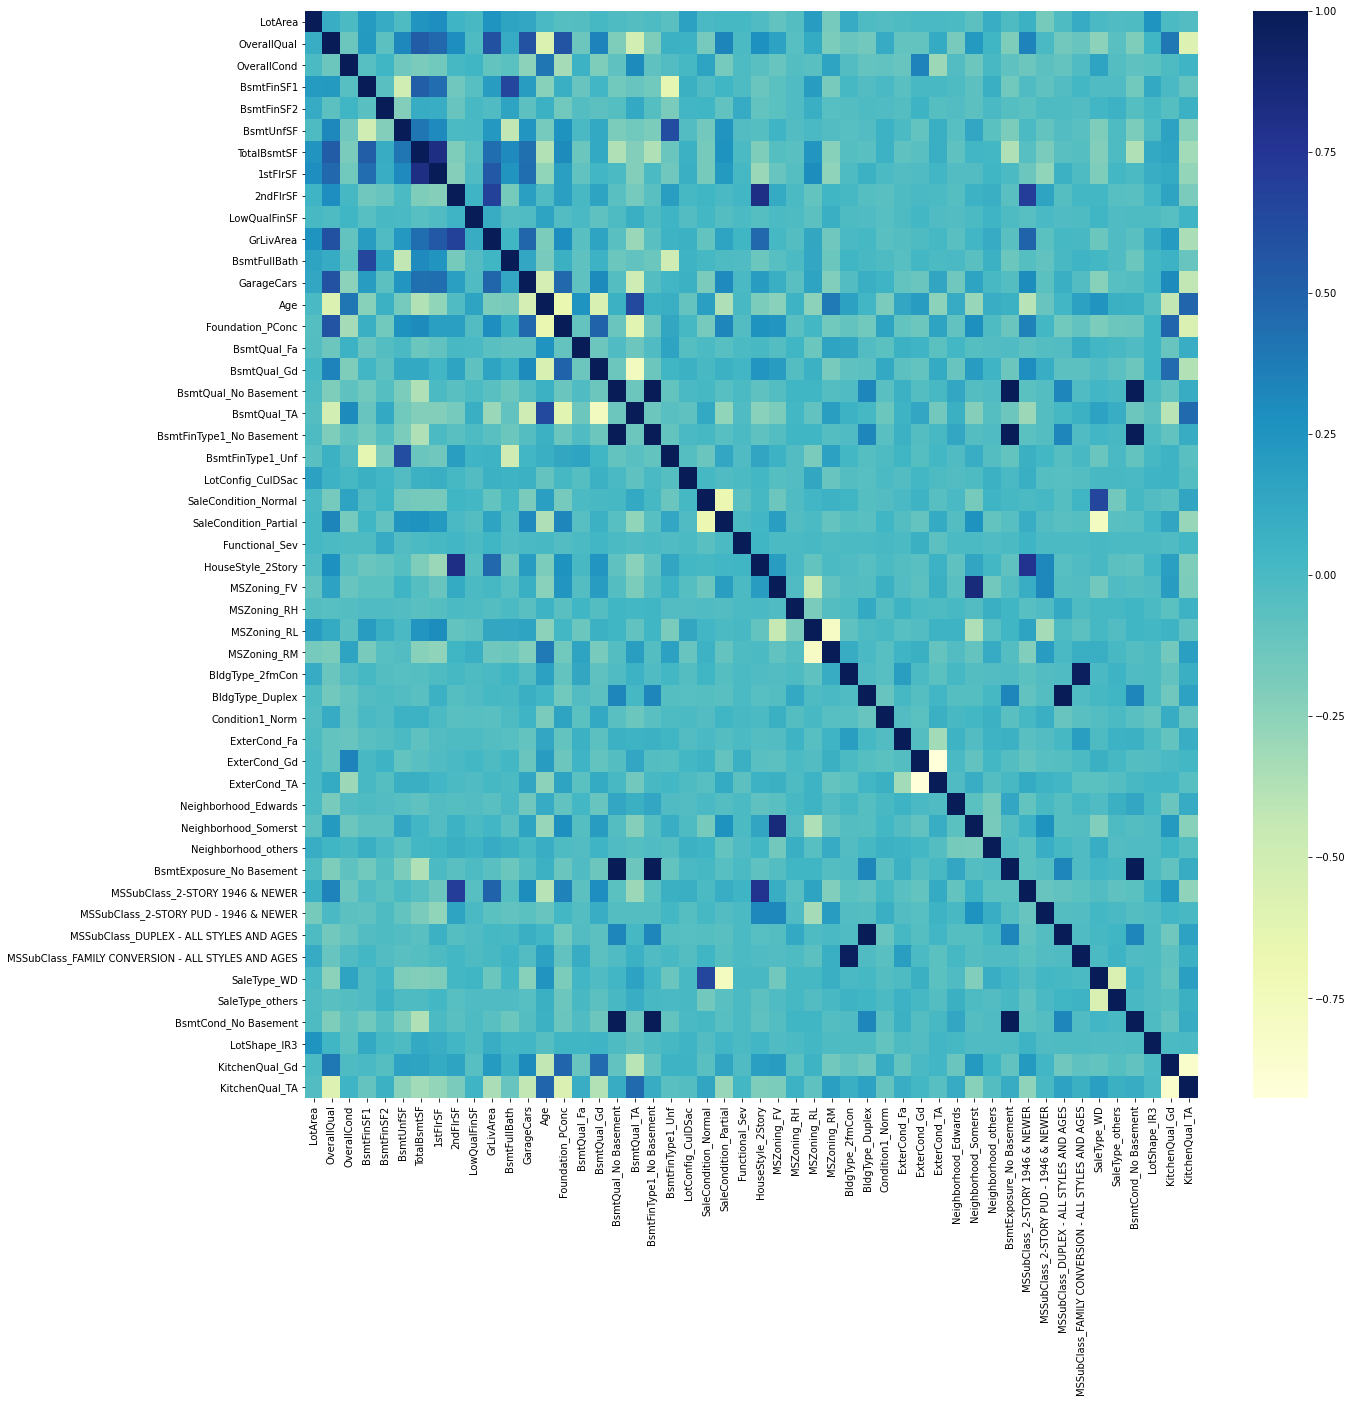

In [130]:
# correlation between the top 50 columns.
plt.figure(figsize = (20,20))
sns.heatmap(data_model[cols_RFE].corr(),cmap="YlGnBu")
plt.show()

##### Metrics - Training data

In [131]:
# Fit the linear regression model using the columns selected with RFE
lm.fit(X_train[cols_RFE],y_train)

LinearRegression()

In [132]:
y_train_pred = lm.predict(X_train[cols_RFE])
y_train_pred

array([11.88132424, 12.18198218, 11.67941994, 12.76231812, 12.34116186,
       12.23173951, 12.82040991, 11.9327146 , 12.8018689 , 12.38858618,
       11.98471655, 11.60456033, 12.22885718, 12.16415991, 11.8979258 ,
       11.71530862, 12.70444311, 11.72116799, 11.67404885, 11.51999612,
       12.22842993, 11.56589455, 11.65207619, 11.75461526, 12.19717993,
       11.66941018, 12.82645239, 11.06882424, 11.69150366, 12.57719849,
       12.36313452, 12.03220315, 12.53317971, 13.10971655, 12.60996069,
       11.55075784, 11.50778909, 12.06491799, 12.05612893, 11.81809182,
       11.73606057, 12.14255471, 12.35849585, 11.90280862, 12.28696265,
       11.62546487, 12.63144507, 11.82932229, 11.79550757, 12.28159155,
       12.2764646 , 12.14926733, 12.56406226, 12.31479468, 12.14438452,
       11.85373635, 12.67441382, 11.84421487, 11.72019143, 12.62485327,
       12.39682593, 11.6467051 , 11.72458596, 12.03598608, 12.21909155,
       12.34897436, 11.99631448, 11.74069924, 11.97812476, 12.38

###### Residual analysis

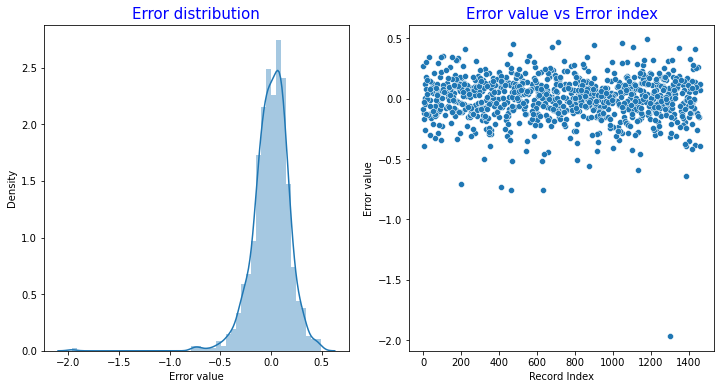

In [133]:
res = y_train - y_train_pred

# Plotting distribution of the residuals
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(res)
plt.title('Error distribution',fontsize=15, fontdict = {'color':'blue'})
plt.xlabel('Error value')

plt.subplot(122)
sns.scatterplot(res.index, res)
plt.title('Error value vs Error index',fontsize=15, fontdict = {'color':'blue'})
plt.ylabel('Error value')
plt.xlabel('Record Index')
plt.show()

 -  Error/Residual values are normally distribution and with the mean value nearly zero. Also, we could see that there is no visual patter in error terms.

###### Compare y_train and y_train_pred

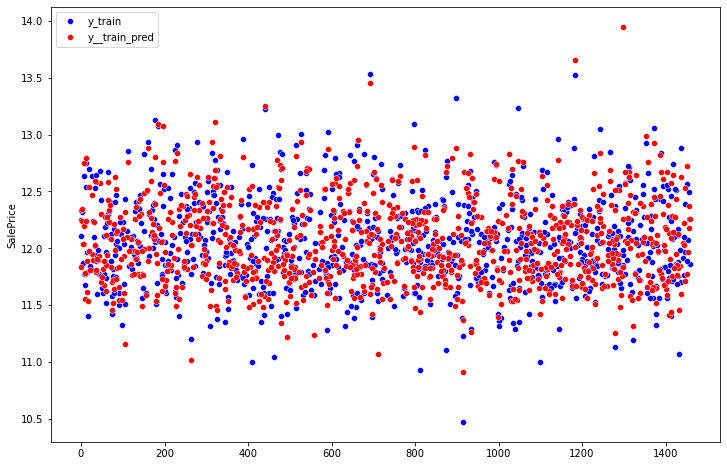

In [134]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(111)
sns.scatterplot(x=y_train.index,y=y_train,color='blue',label = 'y_train')
sns.scatterplot(x=y_train.index,y=y_train_pred,color='red',label = 'y__train_pred')
plt.legend(loc = 'upper left')
plt.show()

###### Training data - R2_score & MSE 

In [135]:
train_r2= r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

In [136]:
print('Scores for the predicted values')
print("R2_score : {}".format(train_r2))
print("MSE : {}".format(train_mse))

Scores for the predicted values
R2_score : 0.7718036771299271
MSE : 0.03291948219504469


##### Metrics - Test dataset

In [137]:
y_test_pred = lm.predict(X_test[cols_RFE])
#y_test_pred

- Residual analysis

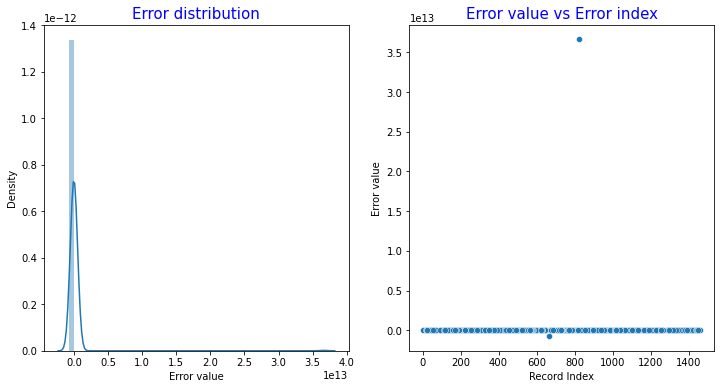

In [138]:
res = y_test - y_test_pred

# Plotting distribution of the residuals
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(res)
plt.title('Error distribution',fontsize=15, fontdict = {'color':'blue'})
plt.xlabel('Error value')

plt.subplot(122)
sns.scatterplot(res.index, res)
plt.title('Error value vs Error index',fontsize=15, fontdict = {'color':'blue'})
plt.ylabel('Error value')
plt.xlabel('Record Index')
plt.show()

  - Predicted value having outlier with huge values. Lets remove that row and plot the error distribution.

In [139]:
y_df_temp= pd.DataFrame()
y_df_temp['test'] = y_test
y_df_temp['test_pred'] = y_test_pred

In [140]:
y_df_temp[(y_df_temp['test_pred']>100)|(y_df_temp['test_pred']<-100)]

,test,test_pred
821,11.440355,-3.661628e+13
666,11.767568,7.115985e+11


In [141]:
# drop that partialcular value and plot the residual values
y_df_temp.drop(y_df_temp[(y_df_temp['test_pred']>100)|(y_df_temp['test_pred']<-100)].index,inplace=True)

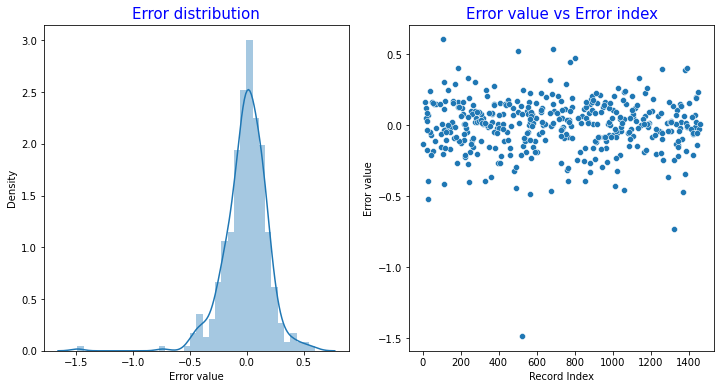

In [142]:
res = y_df_temp['test'] - y_df_temp['test_pred']

# Plotting distribution of the residuals
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(res)
plt.title('Error distribution',fontsize=15, fontdict = {'color':'blue'})
plt.xlabel('Error value')

plt.subplot(122)
sns.scatterplot(res.index, res)
plt.title('Error value vs Error index',fontsize=15, fontdict = {'color':'blue'})
plt.ylabel('Error value')
plt.xlabel('Record Index')
plt.show()

- We are getting more errors in the test dataset. So, the model is over fitted with training data.

###### Compare y_test and y_test_pred

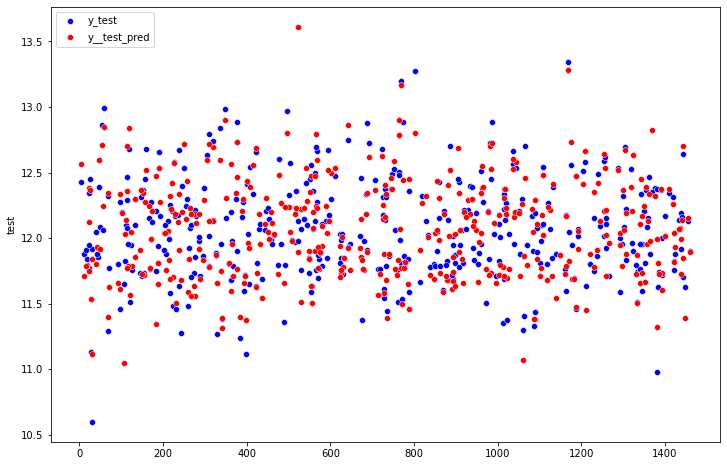

In [143]:
# Plot without oulier data points
plt.figure(figsize=(12,8))
ax1 = plt.subplot(111)
sns.scatterplot(x=y_df_temp.index,y=y_df_temp['test'],color='blue',label = 'y_test')
sns.scatterplot(x=y_df_temp.index,y=y_df_temp['test_pred'],color='red',label = 'y__test_pred')
plt.legend(loc = 'upper left')
plt.show()

###### Training data - R2_score & MSE 

In [144]:
test_r2 = r2_score(y_test , y_test_pred)
test_mse = mean_squared_error(y_test , y_test_pred)

In [145]:
print('Scores for the predicted values')
print("R2_score : {}".format(test_r2))
print("MSE : {}".format(test_mse))

Scores for the predicted values
R2_score : -2.2374845173787513e+25
MSE : 3.239753699814122e+24


Scores are very low and we need to regularize using Ridge and Lasso models

--

Lets create a model_df to compare the co_efficients for all three models

In [146]:
model_df = pd.DataFrame(index=X_train.columns)

In [147]:
# Columns with the coefficient values
lm_coeff_df = pd.DataFrame(lm.coef_,index=cols_RFE)

In [148]:
# Add them to model_df dataframe
model_df = pd.merge(model_df,lm_coeff_df,how='left',left_on=model_df.index,right_on=lm_coeff_df.index)
model_df.set_index("key_0",inplace=True)
model_df.columns = ['Linear']
model_df.head()

,Linear
key_0,
LotFrontage,NaN
LotArea,0.029829
OverallQual,0.108326
OverallCond,-0.020369
MasVnrArea,NaN


Create a dataframe for metrics scores 

In [149]:
metrics_df = pd.DataFrame(index=["train_R2_score","test_R2_score","train_MSE","test_MSE"])

In [150]:
metrics_df['Linear_model'] = [train_r2,test_r2,train_mse,test_mse]

In [151]:
#metrics_df

### 2. Ridge regression model

Alpha

In [152]:
# create a dictionary for validating different alpha values
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,2000 ]}

In [153]:
# load Ridge model
ridge = Ridge()

In [154]:
# Provide input datas for grid search CV
ridge_model_cv = GridSearchCV(estimator=ridge,
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              n_jobs = -1,
                              cv = 5, 
                              return_train_score=True,
                              verbose = 1
                             )

In [155]:
%%time
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits
Wall time: 3.4 s


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [156]:
# Finding best parameters
ridge_model_cv.best_params_

{'alpha': 100}

With the ridge regression model, we could find the best alpha value as 100.

Lets use this value and find the metrics values.

In [157]:
# Fitting model with the alpha value 100

alpha=100

ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# coefficients based on Ridge model
#print(ridge.coef_)

Ridge(alpha=100)

In [158]:
# Make prediction with training data
y_train_pred = ridge.predict(X_train)

##### Metrics (Ridge) - Training data

###### Residual analysis

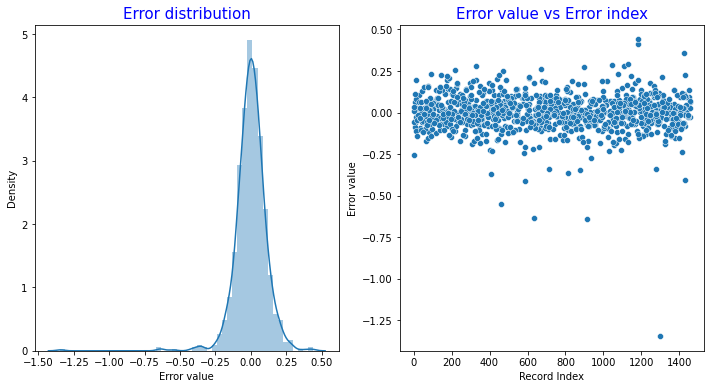

In [159]:
res = y_train - y_train_pred

# Plotting distribution of the residuals
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(res)
plt.title('Error distribution',fontsize=15, fontdict = {'color':'blue'})
plt.xlabel('Error value')

plt.subplot(122)
sns.scatterplot(res.index, res)
plt.title('Error value vs Error index',fontsize=15, fontdict = {'color':'blue'})
plt.ylabel('Error value')
plt.xlabel('Record Index')
plt.show()

 -  Error/Residual values are normally distribution and with the mean value nearly zero. Also, we could see that there is no visual patter in error terms.

###### Compare y_train and y_train_pred

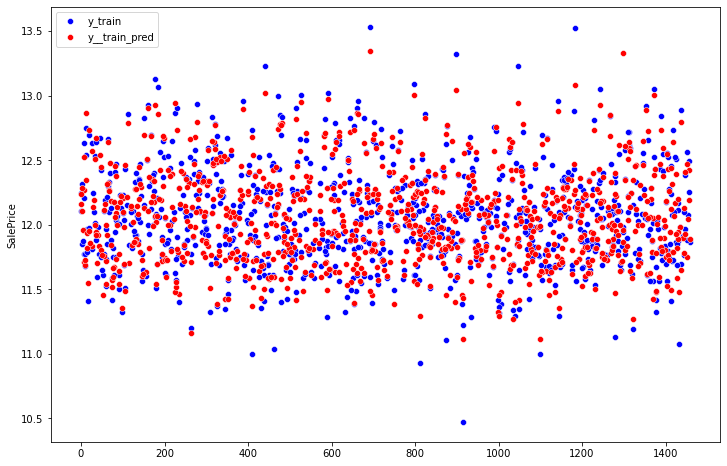

In [160]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(111)
sns.scatterplot(x=y_train.index,y=y_train,color='blue',label = 'y_train')
sns.scatterplot(x=y_train.index,y=y_train_pred,color='red',label = 'y__train_pred')
plt.legend(loc = 'upper left')
plt.show()

###### Training data - R2_score & MSE 

In [161]:
train_r2= r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

In [162]:
print('Scores for the predicted values')
print("R2_score : {}".format(train_r2))
print("MSE : {}".format(train_mse))

Scores for the predicted values
R2_score : 0.9143071572257234
MSE : 0.012362004682944523


##### Metrics (Ridge) - Test data

In [163]:
# Make prediction on test data
y_test_pred = ridge.predict(X_test)

###### Residual analysis

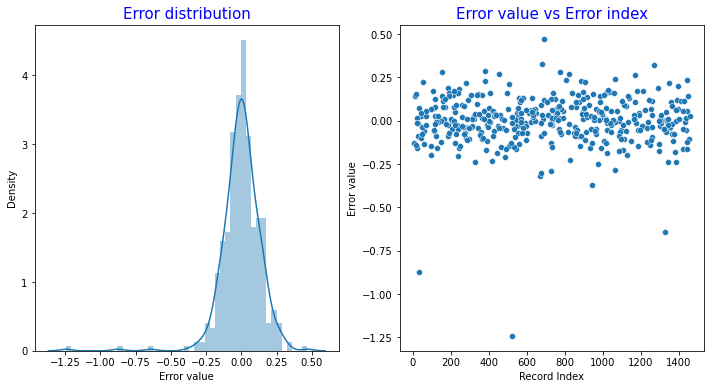

In [164]:
res = y_test - y_test_pred

# Plotting distribution of the residuals
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(res)
plt.title('Error distribution',fontsize=15, fontdict = {'color':'blue'})
plt.xlabel('Error value')

plt.subplot(122)
sns.scatterplot(res.index, res)
plt.title('Error value vs Error index',fontsize=15, fontdict = {'color':'blue'})
plt.ylabel('Error value')
plt.xlabel('Record Index')
plt.show()

###### Compare y_test and y_test_pred

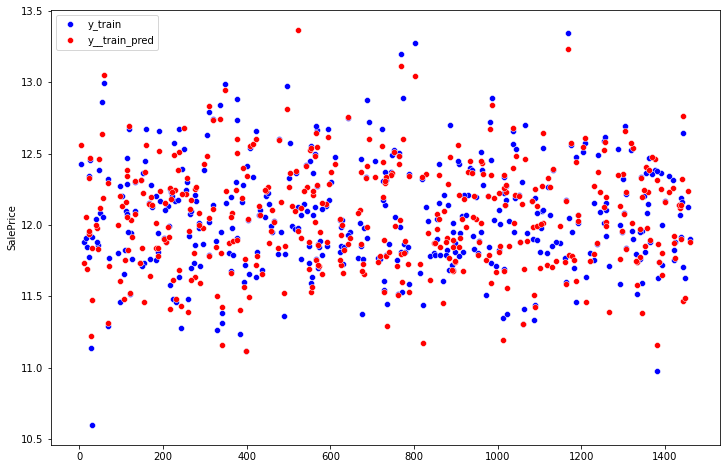

In [165]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(111)
sns.scatterplot(x=y_test.index,y=y_test,color='blue',label = 'y_train')
sns.scatterplot(x=y_test.index,y=y_test_pred,color='red',label = 'y__train_pred')
plt.legend(loc = 'upper left')
plt.show()

###### Training data - R2_score & MSE 

In [166]:
test_r2= r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [167]:
print('Scores for the predicted values')
print("R2_score : {}".format(test_r2))
print("MSE : {}".format(test_mse))

Scores for the predicted values
R2_score : 0.8650818810506087
MSE : 0.01953539663149597


In [168]:
len(ridge.coef_)

168

In [169]:
model_df['Ridge']=ridge.coef_

In [170]:
#model_df.head()

In [171]:
metrics_df['Ridge_model'] = [train_r2,test_r2,train_mse,test_mse]

- Now the overfitting of the regression model is fixed and we are getting good score on the test data set too.

## 3. Lasso regression model

In [172]:
# create a dictionary for validating different alpha values
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,2000 ]}

In [173]:
# Create varaiable for Lasso model

lasso = Lasso()

In [174]:
# Provide input datas for grid search CV
lasso_model_cv = GridSearchCV(estimator=lasso,
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              n_jobs = -1,
                              cv = 5, 
                              return_train_score=True,
                              verbose = 1
                             )

In [175]:
%%time
lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits
Wall time: 415 ms


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [176]:
lasso_model_cv.best_params_

{'alpha': 0.001}

Lasso regression model provides best alpha values as 0.001.

Lets use this value and validate the metrics scores

In [177]:
# Fitting model with the alpha value 0.001

alpha=0.001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

#### Metrics (Lasso) - Training dataset

In [178]:
# Predict the y values based on training dataset
y_train_pred = lasso.predict(X_train)

Residual analysis

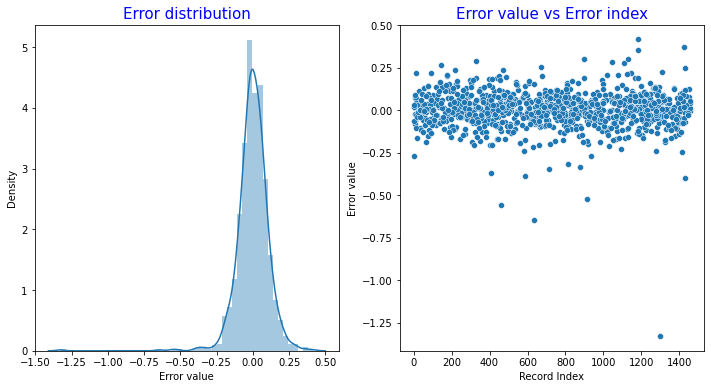

In [179]:
res = y_train - y_train_pred

# Plotting distribution of the residuals
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(res)
plt.title('Error distribution',fontsize=15, fontdict = {'color':'blue'})
plt.xlabel('Error value')

plt.subplot(122)
sns.scatterplot(res.index, res)
plt.title('Error value vs Error index',fontsize=15, fontdict = {'color':'blue'})
plt.ylabel('Error value')
plt.xlabel('Record Index')
plt.show()

 -  Error/Residual values are normally distribution and with the mean value nearly zero. Also, we could see that there is no visual patter in error terms.

###### Compare y_train and y_train_pred

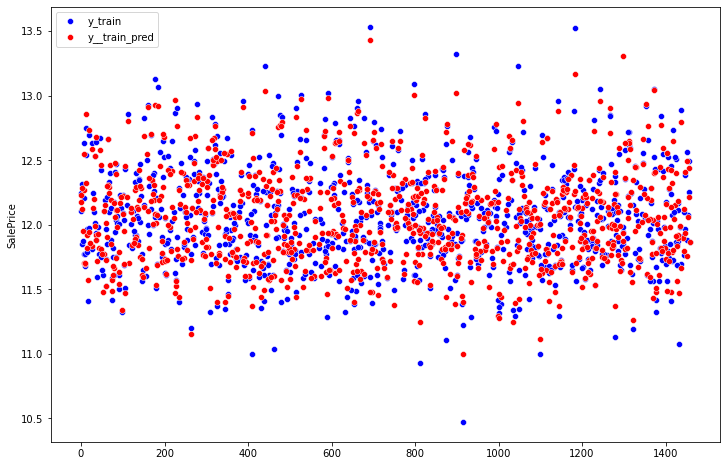

In [180]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(111)
sns.scatterplot(x=y_train.index,y=y_train,color='blue',label = 'y_train')
sns.scatterplot(x=y_train.index,y=y_train_pred,color='red',label = 'y__train_pred')
plt.legend(loc = 'upper left')
plt.show()

###### Training data - R2_score & MSE 

In [181]:
train_r2= r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

In [182]:
print('Scores for the predicted values')
print("R2_score : {}".format(train_r2))
print("MSE : {}".format(train_mse))

Scores for the predicted values
R2_score : 0.9178039433088157
MSE : 0.011857560151348033


#### Metrics (Lasso) - Test dataset

In [183]:
# Predict the y values based on training dataset
y_test_pred = lasso.predict(X_test)

Residual analysis

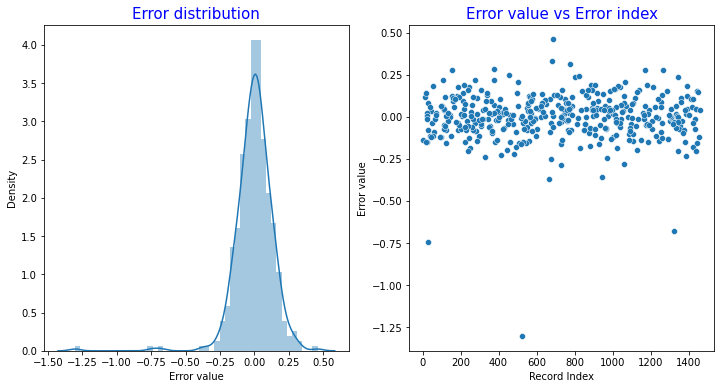

In [184]:
res = y_test - y_test_pred

# Plotting distribution of the residuals
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(res)
plt.title('Error distribution',fontsize=15, fontdict = {'color':'blue'})
plt.xlabel('Error value')

plt.subplot(122)
sns.scatterplot(res.index, res)
plt.title('Error value vs Error index',fontsize=15, fontdict = {'color':'blue'})
plt.ylabel('Error value')
plt.xlabel('Record Index')
plt.show()

###### Compare y_test and y_test_pred

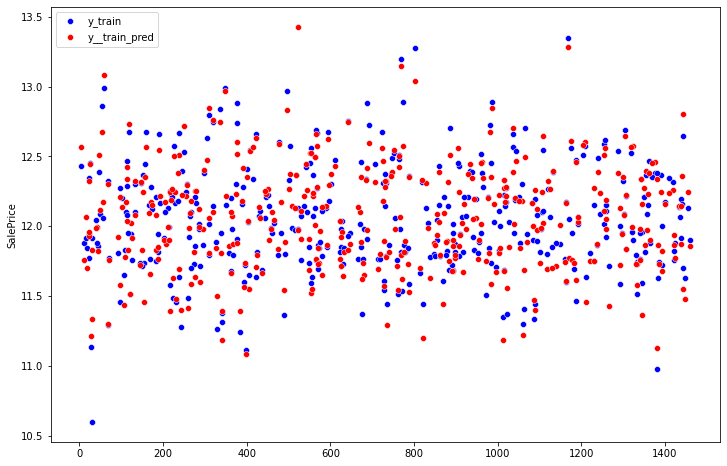

In [185]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(111)
sns.scatterplot(x=y_test.index,y=y_test,color='blue',label = 'y_train')
sns.scatterplot(x=y_test.index,y=y_test_pred,color='red',label = 'y__train_pred')
plt.legend(loc = 'upper left')
plt.show()

###### Training data - R2_score & MSE 

In [186]:
test_r2= r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [187]:
print('Scores for the predicted values')
print("R2_score : {}".format(test_r2))
print("MSE : {}".format(test_mse))

Scores for the predicted values
R2_score : 0.8686386261649199
MSE : 0.019020399631343093


In [188]:
model_df['Lasso']=lasso.coef_

In [189]:
metrics_df['Lasso'] = [train_r2,test_r2,train_mse,test_mse]

In [190]:
# Compare the variables with their co-efficients
model_df

,Linear,Ridge,Lasso
key_0,,,
LotFrontage,NaN,-0.003471,-0.005190
LotArea,0.029829,0.015253,0.017239
OverallQual,0.108326,0.059396,0.069362
OverallCond,-0.020369,0.041071,0.046426
MasVnrArea,NaN,0.010761,0.006078
...,...,...,...
Exterior1st_Plywood,NaN,0.005291,0.000000
Exterior1st_VinylSd,NaN,0.001207,0.000000
Exterior1st_Wd Sdng,NaN,-0.005030,-0.002661


In [191]:
# Scores on training test data set for all three models
metrics_df

,Linear_model,Ridge_model,Lasso
train_R2_score,7.718037e-01,0.914307,0.917804
test_R2_score,-2.237485e+25,0.865082,0.868639
train_MSE,3.291948e-02,0.012362,0.011858
test_MSE,3.239754e+24,0.019535,0.019020


Compared to RFE linear regression model, Ridge and Lasso models are performing good.

Ridge and Lasso prediction scores are almost same. 
Lets validate the number of features used in Lasso model.

In [192]:
# Lasso model - no of features
len(model_df[model_df['Lasso']>0])

61

We can achieve the same level of accuracy only with 61 features.

## Subjective questions

#### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Below are the optimal alpha values for both models and their R2_scores are nearly 0.91 on training data and 0.86 test data.
- Ridge regression - 100
- Lasso regression - 0.001

If we double the alpha values in both models, we will have the below alpha values
- Ridge regression - 200
- Lasso regression - 0.002

Building the Ridge and Lasso models with doubled alpha values.

###### Ridge

In [194]:
# Fitting model with the alpha value 200

alpha=200

ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=200)

In [195]:
y_train_pred = ridge.predict(X_train)

In [196]:
train_r2= r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

In [197]:
y_test_pred = ridge.predict(X_test)

In [198]:
test_r2= r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [199]:
model_df['Ridge_doubled_alpha']=ridge.coef_

In [200]:
metrics_df['Ridge_doubled_alpha'] = [train_r2,test_r2,train_mse,test_mse]

###### Lasso

In [201]:
# Fitting model with the alpha value 0.002

alpha=0.002

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [202]:
y_train_pred = lasso.predict(X_train)

In [203]:
train_r2= r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

In [204]:
y_test_pred = lasso.predict(X_test)

In [205]:
test_r2= r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [206]:
model_df['Lasso_doubled_alpha']=lasso.coef_

In [207]:
metrics_df['Lasso_doubled_alpha'] = [train_r2,test_r2,train_mse,test_mse]

In [208]:
# Lets validate the scores
metrics_df

,Linear_model,Ridge_model,Lasso,Ridge_doubled_alpha,Lasso_doubled_alpha
train_R2_score,7.718037e-01,0.914307,0.917804,0.908930,0.912296
test_R2_score,-2.237485e+25,0.865082,0.868639,0.864506,0.868209
train_MSE,3.291948e-02,0.012362,0.011858,0.013138,0.012652
test_MSE,3.239754e+24,0.019535,0.019020,0.019619,0.019083


If doubled the alpha values, we are having drip in the R2 scores on both Ridge and Lasso regression models.
Also, there are changes in the co-efficient values for each feature.

In [209]:
# Co-efficients on both models

model_df[["Ridge","Lasso","Ridge_doubled_alpha","Lasso_doubled_alpha"]]

,Ridge,Lasso,Ridge_doubled_alpha,Lasso_doubled_alpha
key_0,,,,
LotFrontage,-0.003471,-0.005190,-0.001170,-0.001090
LotArea,0.015253,0.017239,0.014150,0.016577
OverallQual,0.059396,0.069362,0.054219,0.078751
OverallCond,0.041071,0.046426,0.036391,0.045094
MasVnrArea,0.010761,0.006078,0.010880,0.003847
...,...,...,...,...
Exterior1st_Plywood,0.005291,0.000000,0.003943,-0.000000
Exterior1st_VinylSd,0.001207,0.000000,0.001602,0.000000
Exterior1st_Wd Sdng,-0.005030,-0.002661,-0.004168,-0.000882


Find top predictor variables before the change and after the change.

In [210]:
# Ridge Co-efficients with optimal alpha value
model_df["Ridge"].sort_values(ascending=False).head(20)

key_0
OverallQual                        0.059396
GrLivArea                          0.049624
GarageCars                         0.042117
OverallCond                        0.041071
1stFlrSF                           0.033092
2ndFlrSF                           0.029292
FullBath                           0.028227
MSZoning_RL                        0.026743
TotRmsAbvGrd                       0.023595
CentralAir_Y                       0.018787
Neighborhood_NridgHt               0.018774
Condition1_Norm                    0.018757
SaleCondition_Normal               0.018575
Neighborhood_Somerst               0.018031
BsmtFullBath                       0.017030
LotArea                            0.015253
BsmtExposure_Gd                    0.014601
HalfBath                           0.013891
MSSubClass_2-STORY 1945 & OLDER    0.013777
Foundation_PConc                   0.013223
Name: Ridge, dtype: float64

In [211]:
# Ridge Co-efficients with doubled alpha value
model_df["Ridge_doubled_alpha"].sort_values(ascending=False).head(20)

key_0
OverallQual                        0.054219
GrLivArea                          0.042365
GarageCars                         0.036511
OverallCond                        0.036391
1stFlrSF                           0.030820
FullBath                           0.026261
TotRmsAbvGrd                       0.024441
2ndFlrSF                           0.022706
MSZoning_RL                        0.018707
Neighborhood_NridgHt               0.018241
CentralAir_Y                       0.017759
Condition1_Norm                    0.015883
BsmtFullBath                       0.015096
Neighborhood_Somerst               0.014926
SaleCondition_Normal               0.014529
BsmtExposure_Gd                    0.014395
LotArea                            0.014150
GarageArea                         0.014027
HalfBath                           0.013370
MSSubClass_2-STORY 1945 & OLDER    0.013096
Name: Ridge_doubled_alpha, dtype: float64

In [212]:
# Lasso Co-efficients with optimal alpha value
model_df["Lasso"].sort_values(ascending=False).head(20)

key_0
GrLivArea                                     0.117108
OverallQual                                   0.069362
MSZoning_RL                                   0.062392
GarageCars                                    0.050071
OverallCond                                   0.046426
MSZoning_RM                                   0.033550
MSZoning_FV                                   0.028411
FullBath                                      0.024095
Neighborhood_Somerst                          0.022655
MSSubClass_1-STORY 1946 & NEWER ALL STYLES    0.020909
SaleCondition_Normal                          0.020275
BsmtFullBath                                  0.019884
Condition1_Norm                               0.019866
Neighborhood_NridgHt                          0.019159
CentralAir_Y                                  0.018084
LotArea                                       0.017239
Neighborhood_others                           0.017191
Foundation_PConc                              0.015414
Bsmt

In [213]:
# Lasso Co-efficients with doubled alpha value
model_df["Lasso_doubled_alpha"].sort_values(ascending=False).head(20)

key_0
GrLivArea                                     0.115630
OverallQual                                   0.078751
GarageCars                                    0.049222
OverallCond                                   0.045094
MSZoning_RL                                   0.024277
Neighborhood_Somerst                          0.021374
BsmtFullBath                                  0.020452
FullBath                                      0.020381
Neighborhood_NridgHt                          0.020194
SaleCondition_Partial                         0.020109
MSSubClass_1-STORY 1946 & NEWER ALL STYLES    0.019598
SaleCondition_Normal                          0.018092
Condition1_Norm                               0.017236
Foundation_PConc                              0.016921
CentralAir_Y                                  0.016896
LotArea                                       0.016577
Neighborhood_others                           0.016311
BsmtExposure_Gd                               0.014523
LotC

There some changes in the importance of the features. Top 20 features are highligted above for both Ridge and Lasso models.

#### Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Below are the optimal alpha values for both models. 
- Ridge regression – 100
- Lasso regression - 0.001

R2_scores and mean squared error values are almost same.



In [214]:
metrics_df[["Ridge_model","Lasso"]]

,Ridge_model,Lasso
train_R2_score,0.914307,0.917804
test_R2_score,0.865082,0.868639
train_MSE,0.012362,0.011858
test_MSE,0.019535,0.019020


Lasso model will helps feature reduction by assigning co-efficient values as zero for some features. So, we can choose Lasso over Ridge model in our final application.

#### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [215]:
# Top five predictors in Lasso model

model_df["Lasso"].sort_values(ascending=False).head(5)

key_0
GrLivArea      0.117108
OverallQual    0.069362
MSZoning_RL    0.062392
GarageCars     0.050071
OverallCond    0.046426
Name: Lasso, dtype: float64

- Lets build the Lasso model again without top features of the current model.

In [216]:
cols_to_remove = model_df["Lasso"].sort_values(ascending=False).head(5).index
cols_to_remove

Index(['GrLivArea', 'OverallQual', 'MSZoning_RL', 'GarageCars', 'OverallCond'], dtype='object', name='key_0')

In [217]:
# Remove the top 5 features in train and test sets
X_train_lasso = X_train.drop(cols_to_remove,axis=1)
X_test_lasso = X_test.drop(cols_to_remove,axis=1)

In [218]:
# Building Lasso model with different alpha values
# create a dictionary for validating different alpha values
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,2000 ]}

# Create varaiable for Lasso model
lasso = Lasso()

# Provide input datas for grid search CV
lasso_model_cv = GridSearchCV(estimator=lasso,
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              n_jobs = -1,
                              cv = 5, 
                              return_train_score=True,
                              verbose = 1
                             )

In [219]:
%%time
lasso_model_cv.fit(X_train_lasso, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits
Wall time: 414 ms


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [220]:
lasso_model_cv.best_params_

{'alpha': 0.001}

- New alpha value for the Lasso regression model is 0.001 which is same as previous model.

In [221]:
# Fit model with the updated data set and new alpha value

alpha=0.001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=0.001)

In [222]:
y_train_pred = lasso.predict(X_train_lasso)

In [223]:
train_r2= r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

In [224]:
y_test_pred = lasso.predict(X_test_lasso)

In [225]:
test_r2= r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [226]:
temp_df = pd.DataFrame(index=X_train_lasso.columns,data = lasso.coef_,columns=["Lasso_without_top5"])
temp_df.head()

,Lasso_without_top5
LotFrontage,-0.002241
LotArea,0.016171
MasVnrArea,0.007019
BsmtFinSF1,-0.004644
BsmtFinSF2,0.007596


In [227]:
model_df = pd.merge(model_df,temp_df,how="left",left_on=model_df.index,right_on=temp_df.index)
model_df.head()

,key_0,Linear,Ridge,Lasso,Ridge_doubled_alpha,Lasso_doubled_alpha,Lasso_without_top5
0,LotFrontage,NaN,-0.003471,-0.005190,-0.001170,-0.001090,-0.002241
1,LotArea,0.029829,0.015253,0.017239,0.014150,0.016577,0.016171
2,OverallQual,0.108326,0.059396,0.069362,0.054219,0.078751,NaN
3,OverallCond,-0.020369,0.041071,0.046426,0.036391,0.045094,NaN
4,MasVnrArea,NaN,0.010761,0.006078,0.010880,0.003847,0.007019


In [228]:
model_df.set_index("key_0",inplace=True)

In [229]:
metrics_df['Lasso_without_top5'] = [train_r2,test_r2,train_mse,test_mse]

In [230]:
metrics_df[["Lasso","Lasso_without_top5"]]

,Lasso,Lasso_without_top5
train_R2_score,0.917804,0.895446
test_R2_score,0.868639,0.841632
train_MSE,0.011858,0.015083
test_MSE,0.019020,0.022931


Completed building the Lasso model with the new dataset which are not having the top 5 features from the original data.

- There is no change in the alpha value (0.001).
- The R2 score decreased in both training and test data set.

Below are the new top five features

In [231]:
model_df['Lasso_without_top5'].sort_values(ascending=False).head(5)

key_0
2ndFlrSF                0.103209
1stFlrSF                0.097001
FullBath                0.035169
GarageArea              0.034473
SaleCondition_Normal    0.028100
Name: Lasso_without_top5, dtype: float64

#### Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?


- A model needs to be made robust and generalisable so that we will not have any impact in predicting the output variable with the new dataset which are not used in the training phase.
- A robust and generalized model will be consistently accurate with the test dataset even if the input dataset having high variance.
- If the model is having high complexity, will lead to have huge errors with the new dataset which are having outliers.
- So, we always need to build the model by considering the optimal bias-variance trade off. This will prevent the model being over fitted/under fitted. Also, this will reduce the errors in the predictions.
- We can trust the predicted values of a model only if the model is robust and generalised.